In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import tensorflow.keras as keras
from folium.plugins import HeatMap
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.preprocessing import FunctionTransformer
from sklearn.neural_network import MLPRegressor
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History
from keras.optimizers import Adam

In [2]:
# train_data is the dataset from Kaggle.
data = pd.read_csv("C:/Users/navab/OneDrive/Documents/masterclass/train_data.csv")

In [3]:
data_cleaned = data[data['city'].str.contains('NYC', case=False, na=False)]

# Save the filtered data to a new CSV file called data_cleaned.csv
data_cleaned.to_csv('data_cleaned.csv', index=False)

In [4]:
#data_cleaned['Price'] = np.exp(data_cleaned['log_price'])

In [5]:
data_cleaned=data_cleaned.drop("first_review",axis='columns')

In [6]:
data_cleaned=data_cleaned.drop("host_response_rate",axis='columns')

In [7]:
data_cleaned=data_cleaned.drop("review_scores_rating",axis='columns')

In [8]:
data_cleaned=data_cleaned.drop("last_review",axis='columns')

In [9]:
data_cleaned=data_cleaned.drop("thumbnail_url",axis='columns')

## For travel time columns : 'avg_lead_time','min_lead_time','min_airport_time', 
#'avg_airport_time','man_time','bro_time','que_time','bnx_time', 'sta_time','nj_time'
                        
# Read data from CSV file
data = pd.read_csv("C:/Users/navab/Downloads/train.csv")
data_cleaned = data[data['city'].str.contains('NYC', case=False, na=False)]
 
# Save the filtered data to a new CSV file called data_cleaned.csv
#data_cleaned.to_csv('data_cleaned.csv', index=False)
 
lat_airbnb = data_cleaned['latitude'].tolist()
long_airbnb = data_cleaned['longitude'].tolist()
 
def traveltime(lat, long):
    url = f"http://127.0.0.1:5000/route/v1/driving/{long},{lat};-73.8718,40.7733?steps=true"
    #40.7733, -73.8718  
    response = requests.get(url)
    if response.status_code == 200:
        duration = response.json()['routes'][0]['duration']
        return duration
    else:
        print("Error fetching travel time:", response.text)
        return None
 
# Save results to Excel file
file_path = "C:/Users/navab/OneDrive/Documents/masterclass/airports.xlsx"
 
# Check if the Excel file exists, if not create it with the first row for headers
if not os.path.exists(file_path):
    with pd.ExcelWriter(file_path, engine='openpyxl', mode='w') as writer:
        pd.DataFrame(columns=['start_latitude', 'start_longitude', 
                              'end_latitude', 'end_longitude', 'avg_travel_time', 
                              'min_travel_time']).to_excel(writer, sheet_name='Sheet1', 
                                                           index=False)
 
# Loop through each Airbnb location, calculate travel times, and append to the excel sheet in Excel file
with pd.ExcelWriter(file_path, engine='openpyxl', mode='a') as writer:
    # Load the workbook
    workbook = writer.book
    # Check if the sheet already exists
    sheet_name = 'LaGuardia Airport'
    if sheet_name in workbook.sheetnames:
        worksheet = workbook[sheet_name]
    else:
        worksheet = workbook.create_sheet(sheet_name)
        # Write column headers if the sheet is newly created
        headers = ['start_latitude', 'start_longitude', 'end_latitude', 
                   'end_longitude', 'avg_travel_time', 'min_travel_time']
        worksheet.append(headers)
 
    for lat, long in zip(lat_airbnb, long_airbnb):
        # Calculate travel times
        avg_time = traveltime(lat, long)
        min_time = traveltime(lat, long)
       
        # Append data to the sheet
        data_row = [lat, long, 40.5031, -74.2533 , avg_time, min_time]
        worksheet.append(data_row)
 
# Print confirmation
print("Travel times saved to Excel file.")

# For a new column Borough
 
#longlat = pd.read_csv("longlat.csv",encoding = 'utf-8', sep = '\t')
geolocator = geopy.Nominatim(user_agent="check_1")
 
def get_zip_code(x):
    location = geolocator.reverse("{}, {}".format(x['latitude'],x['longitude']))
    return location.raw['address']['postcode']
appended_df['zipcode_new'] = appended_df.apply(lambda x: get_zip_code(x), axis = 1)
print(appended_df.head())

In [10]:
# Replace null values with median in specific columns
# Specify columns you want to fill null values for
columns_to_fill = ['bathrooms', 'bedrooms', 'beds']  
for column in columns_to_fill:
    # Calculate median for the column
    median_value = data_cleaned[column].median() 
    # Replace null values with median
    data_cleaned[column].fillna(median_value, inplace=True)  

In [11]:
#Appending the amenities to list l
l=list(data_cleaned['amenities'])
# splitting the list of amenities in a individual rows into list of lists
l=[[word.strip('[" ]') for word in row[1:-1].split(',')] for row in l]
#creating a new column 'amenities_lists' and then assiging the previous l to amenities_lists.
data_cleaned['amenities_lists'] = l
all_amenities = [item.strip('[" ]') for sublist in l for item in sublist]
# Count the frequency of each unique amenity
amenity_counts = pd.Series(all_amenities).value_counts()
# Calculate the percentage of occurrence of each amenity
amenity_percentages = (amenity_counts / len(data_cleaned)) * 100
# Output the frequency and percentage of each amenity
print(amenity_counts)
print(len(amenity_percentages))

Wireless Internet            31304
Kitchen                      30068
Heating                      29523
Essentials                   27561
Air conditioning             27159
                             ...  
Air purifier                    12
Washer / Dryer                  11
Lake access                     11
Ski in/Ski out                   6
Roll-in shower with chair        1
Name: count, Length: 117, dtype: int64
117


In [12]:
# Convert list of amenities to string
data_cleaned['amenities_lists'] = data_cleaned['amenities_lists'].apply(lambda x: ','.join(x))

# Split the string into separate columns
amenities_df = data_cleaned['amenities_lists'].str.get_dummies(sep=',')

# Concatenate the new columns with the original DataFrame
data_cleaned = pd.concat([data_cleaned, amenities_df], axis=1)

# Drop the original 'amenities_lists' column
data_cleaned.drop(columns=['amenities_lists'], inplace=True)

In [13]:
dummy_df=data_cleaned.copy()

In [14]:
columns_to_drop = ['id', 'accommodates','log_price','room_type','amenities','property_type','bathrooms','bed_type',
                   'cancellation_policy','cleaning_fee','city','description','host_has_profile_pic','host_identity_verified',
                  'host_since','instant_bookable','latitude','longitude','name','neighbourhood','number_of_reviews',
                   'beds','Borough','bedrooms','zipcode']

# Drop the specified columns
dummy_df.drop(columns=columns_to_drop, inplace=True)

In [15]:
new_data = pd.read_excel('C:/Users/navab/OneDrive/Documents/masterclass/append.xlsx')

# EDA 

C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

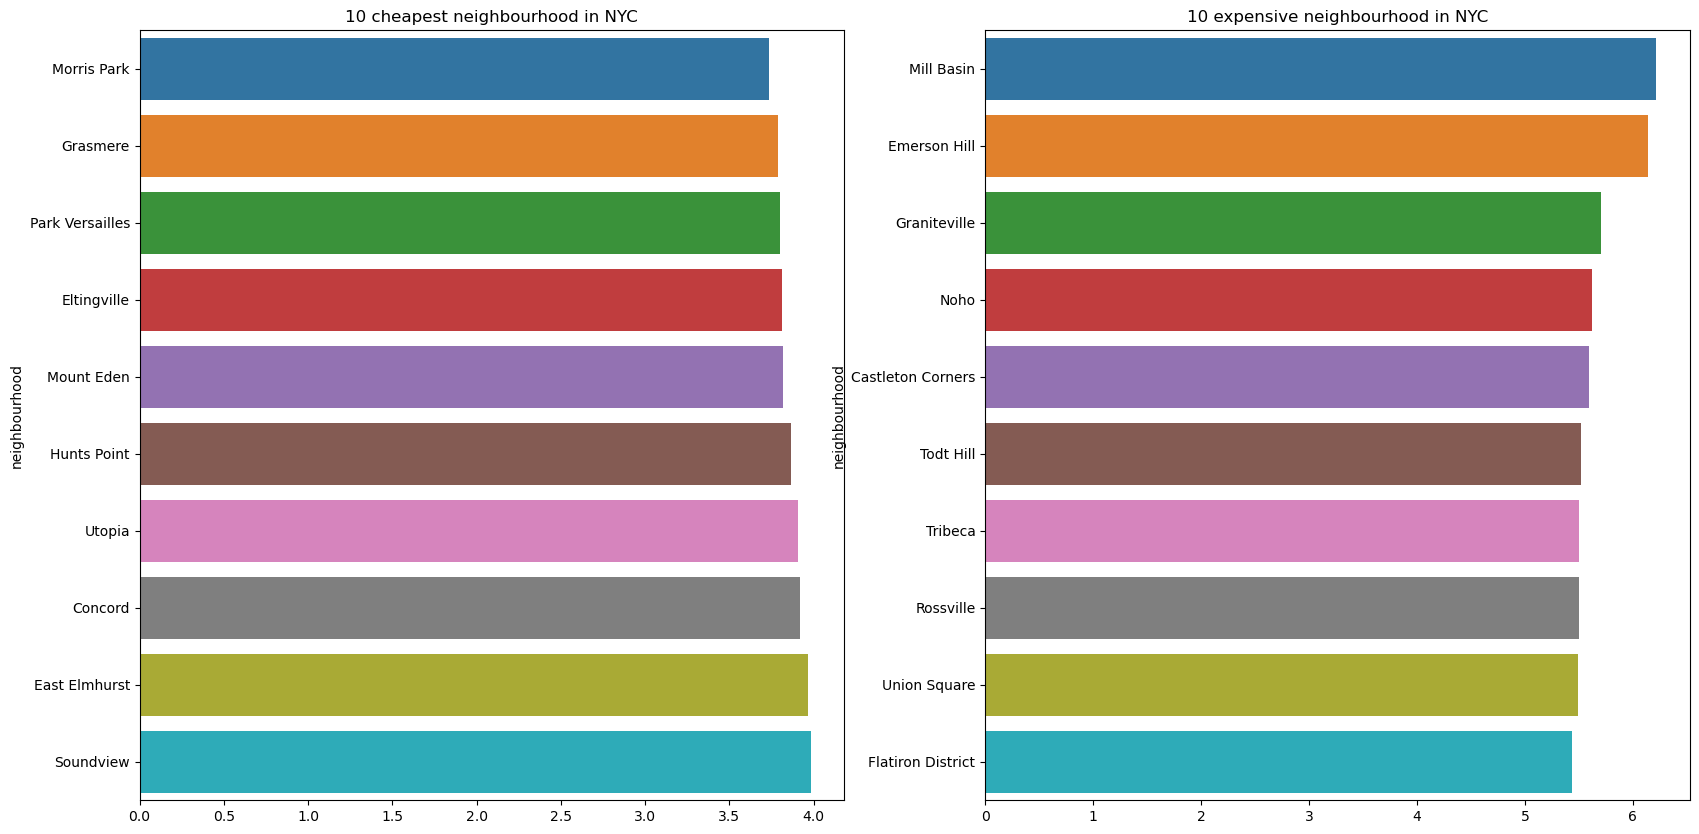

In [16]:
#Top 10 expensive & Cheapest neighbourhood in NYC
a = data_cleaned.groupby('neighbourhood')['log_price'].mean().sort_values(ascending=True).head(10)
b = data_cleaned.groupby('neighbourhood')['log_price'].mean().sort_values(ascending=False).head(10)
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
sns.barplot(y=a.index, x=a.values, ax=ax1)
ax1.set_title('10 cheapest neighbourhood in NYC')
ax2 = fig.add_subplot(122)
sns.barplot(y=b.index, x=b.values, ax=ax2)
ax2.set_title('10 expensive neighbourhood in NYC')
plt.show()

C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

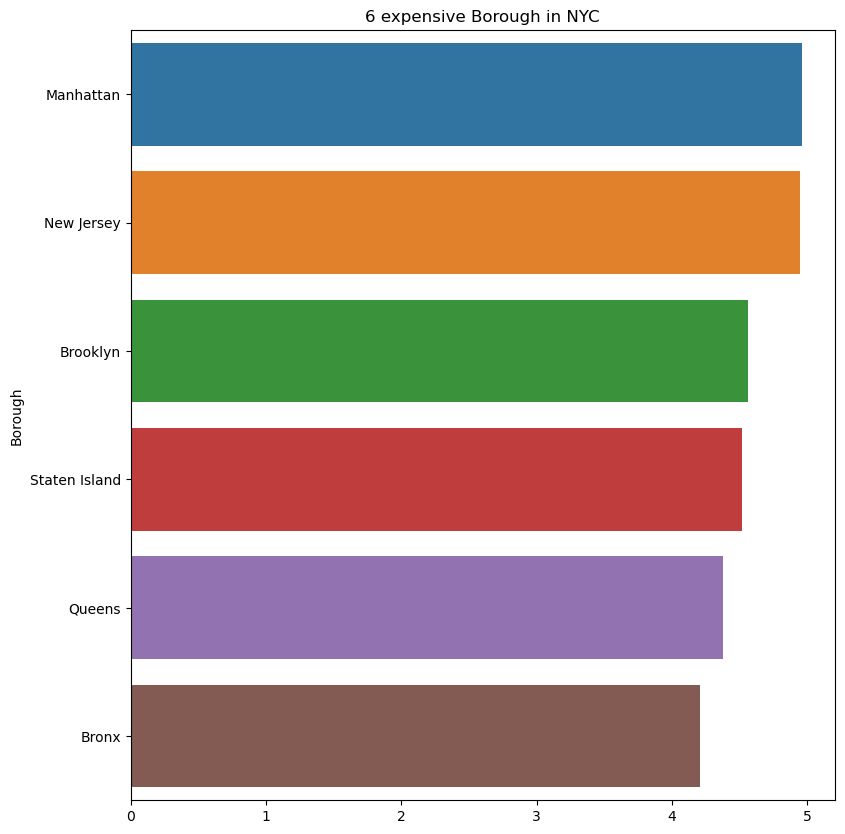

In [40]:
#Top 6 expensive & Cheapest Borough in NYC
a = data_cleaned.groupby('Borough')['log_price'].mean().sort_values(ascending=True).head(10)
b = data_cleaned.groupby('Borough')['log_price'].mean().sort_values(ascending=False).head(10)
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(122)
sns.barplot(y=b.index, x=b.values, ax=ax2)
ax1.set_title('6 expensive Borough in NYC')
plt.show()

Text(0.5, 0, 'Type')

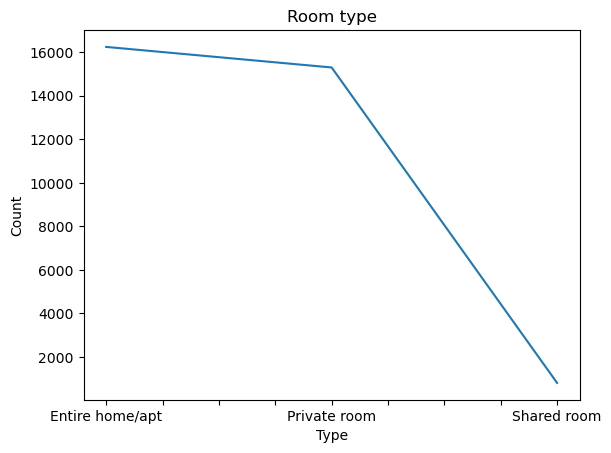

In [41]:
#Ploting room count
data_cleaned['room_type'].value_counts().plot(kind='line')
plt.title('Room type')
plt.ylabel('Count')
plt.xlabel('Type')

C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'log_price')

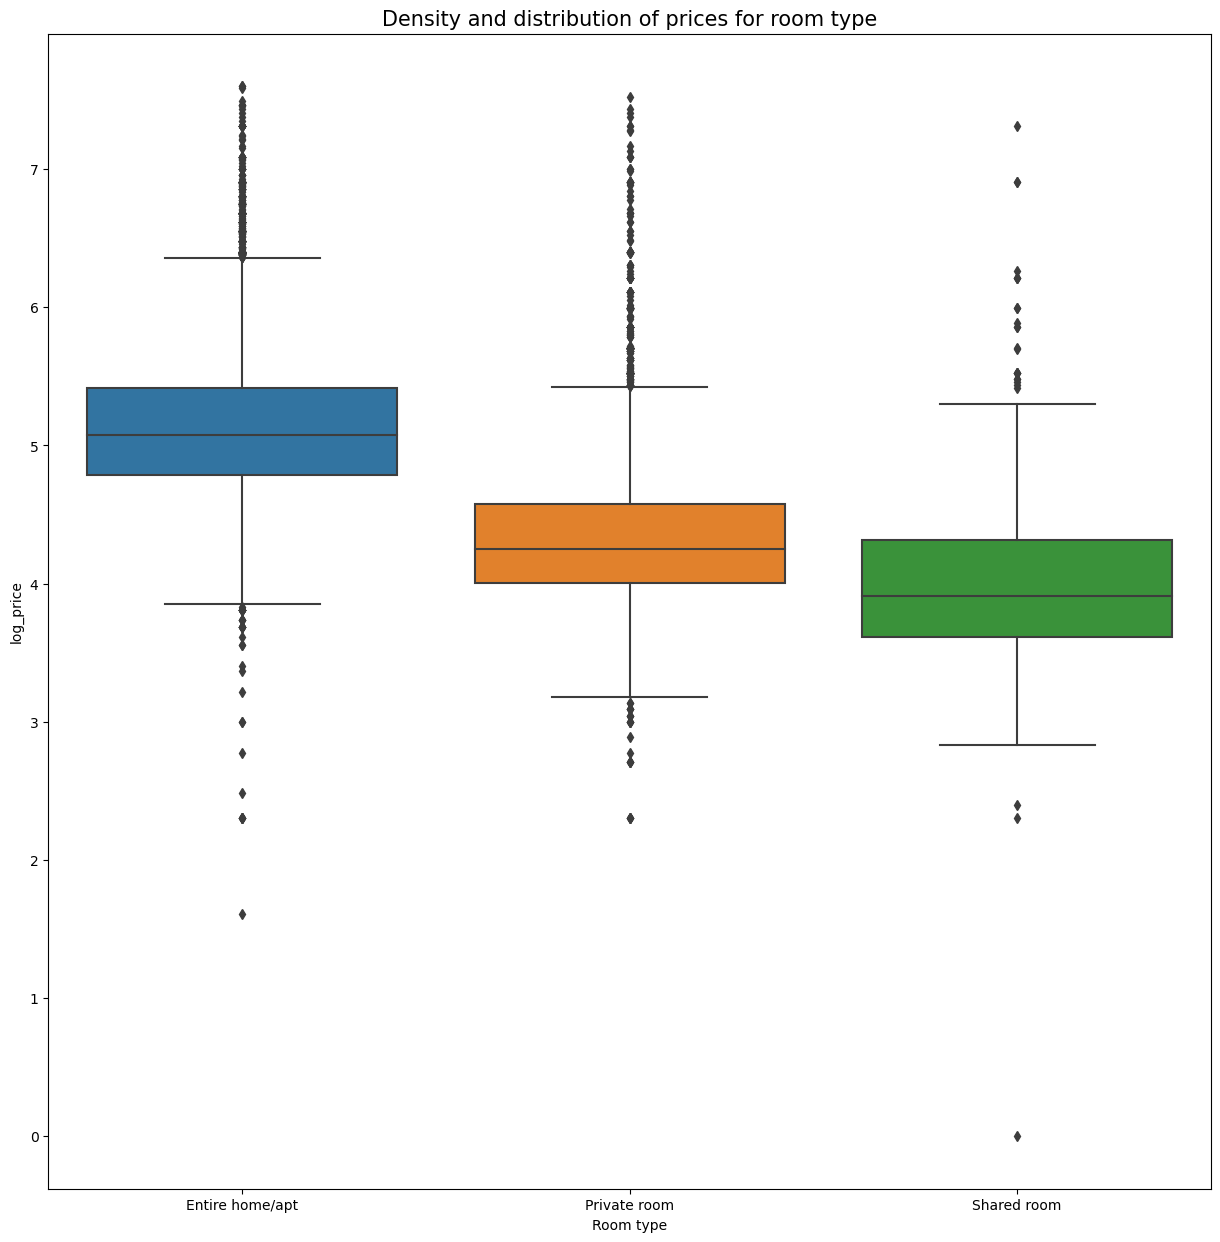

In [42]:
#Box Plot to view outliers
plt.figure(figsize=(15,15))
sns.boxplot(data=data_cleaned, x='room_type', y='log_price')
plt.title('Density and distribution of prices for room type', fontsize=15)
plt.xlabel('Room type')
plt.ylabel("log_price")



C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

Text(0.5, 1.0, 'Room type vs log_price vs Instantly bookable')

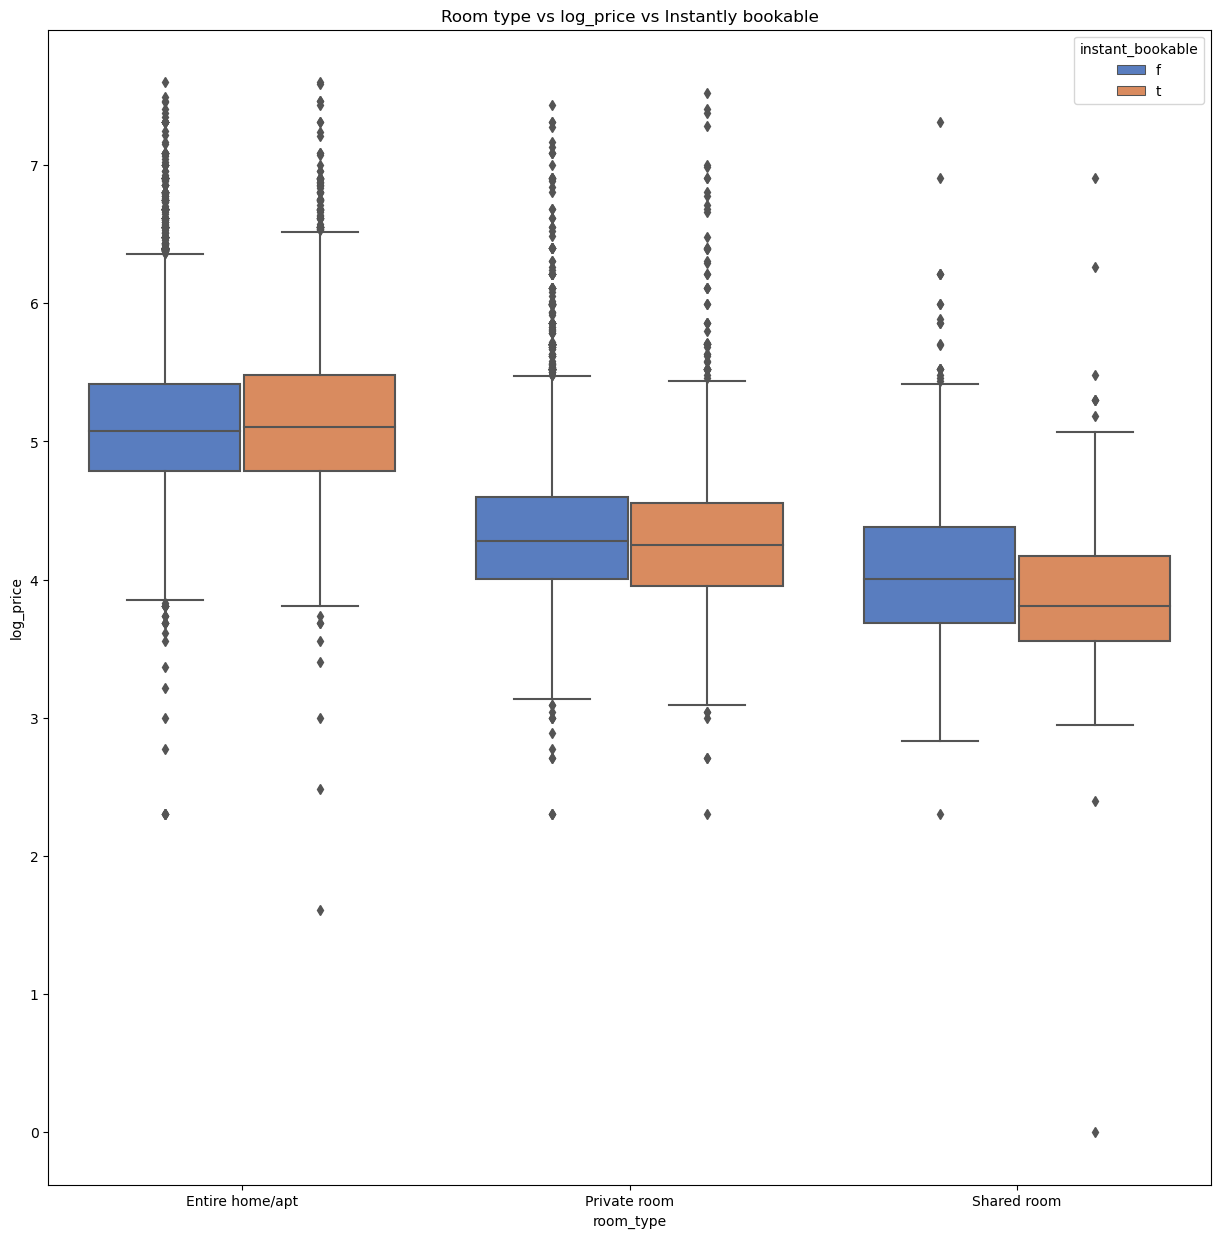

In [43]:
#correlating instant bookable rooms with price
plt.figure(figsize=(15,15))
sns.boxplot(x='room_type',y='log_price', hue="instant_bookable", data=data_cleaned, palette='muted')
plt.title("Room type vs log_price vs Instantly bookable")

C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

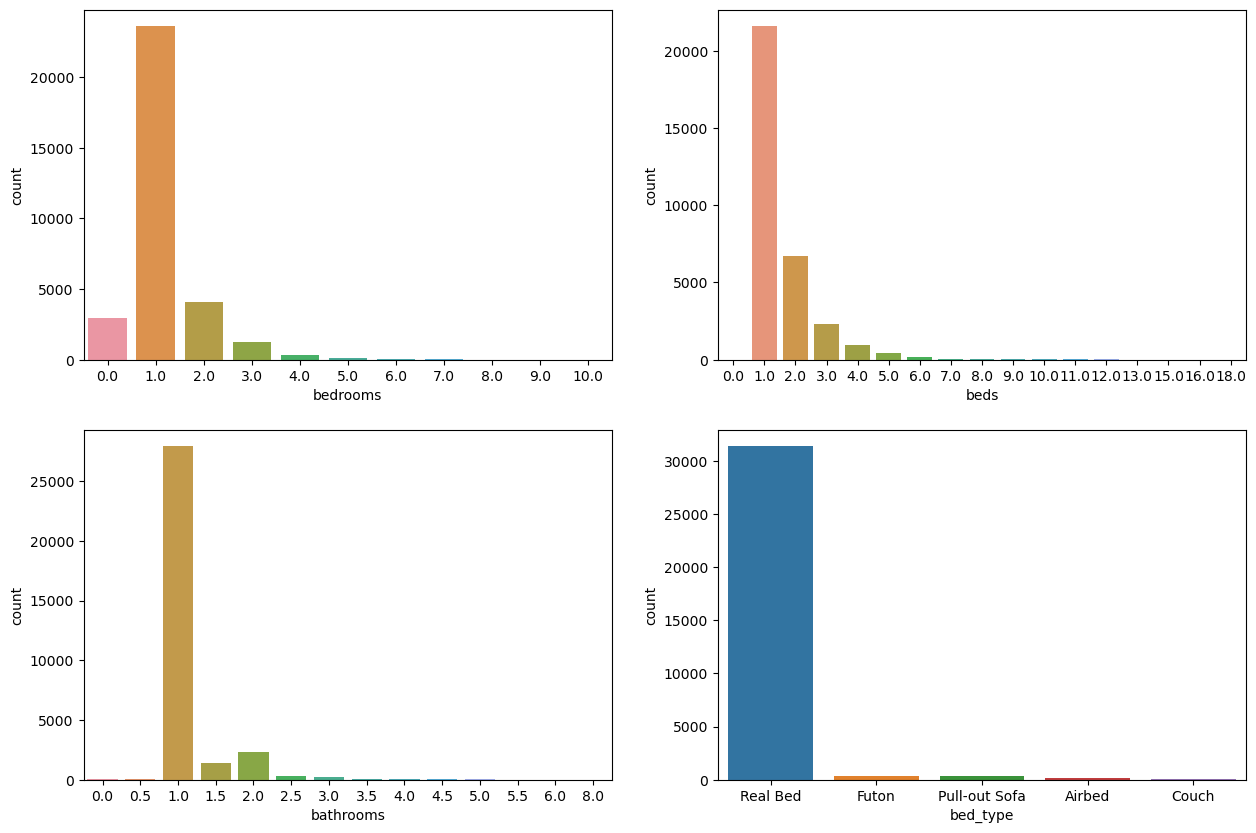

In [44]:
#plotting the count of bedrooms, beds and bathrooms.
a=['bedrooms','beds','bathrooms','bed_type']
fig, axes = plt.subplots(2,2, figsize=(15,10))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(a):
    f = sns.countplot(x=data_cleaned[c], data=data_cleaned, ax=axes[i])

C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Number of accomodates vs Average Price')

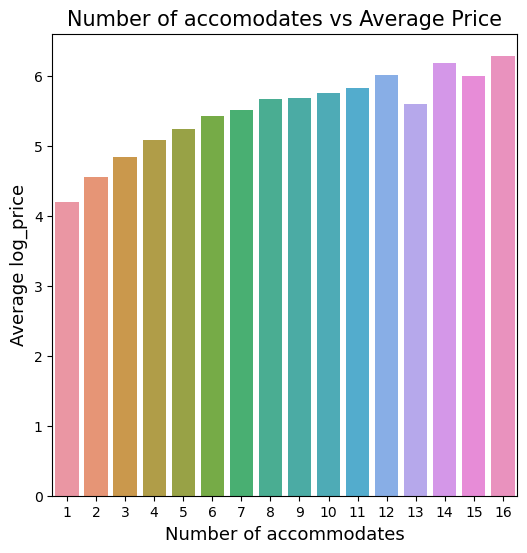

In [45]:
#plotting the number of accomodates vs mean price
a = data_cleaned.groupby('accommodates')['log_price'].mean()
fig = plt.figure(figsize=(6,6))
sns.barplot(y=a.values, x=a.index)
plt.xlabel("Number of accommodates", size=13)
plt.ylabel("Average log_price", size=13)
plt.title("Number of accomodates vs Average Price",size=15)

# PCA

In [46]:
#need to perform pca on dummy_df 
scaler = StandardScaler()


In [47]:
scaled_df = dummy_df.copy()

In [48]:
pca = PCA(n_components=116)

In [49]:
pca1=PCA(n_components = 6)

In [50]:
pca_fit = pca.fit(scaled_df)

In [51]:
pca_fit12 = pca1.fit(scaled_df)

In [52]:
pca_fit1=pca1.transform(scaled_df)

In [53]:
pca1.transform(scaled_df[:10])

array([[-0.90916485,  0.67098536, -0.11363374, -0.14312535, -0.4720934 ,
        -0.70869393],
       [ 0.22671317, -0.18588049, -0.12756232,  0.47836983, -0.9861846 ,
        -0.06894436],
       [ 0.84820579, -0.0865393 , -0.83606252, -0.54876363,  0.09392135,
        -0.23226128],
       [-0.24722771, -0.43825311, -0.02446602,  0.9054012 ,  0.08668707,
        -0.52740351],
       [ 0.55000783, -0.67199769, -0.45413841, -0.3324732 ,  0.5508604 ,
        -0.79008623],
       [ 1.38034551,  2.06977275,  1.27229229, -0.1902538 , -0.23603094,
        -0.31751237],
       [-1.46252884,  0.63757906, -0.2360511 ,  0.39468253,  0.86735509,
         0.6490018 ],
       [ 2.65433133,  1.40603334,  1.58680088, -1.18161669,  0.83507792,
         0.25203944],
       [ 0.72370279, -0.96664313,  0.01645009,  0.60813636, -0.41236838,
        -0.09579175],
       [ 0.28946438, -0.71472348, -0.33853471,  1.53258638,  0.36791549,
        -1.16004722]])

In [54]:
pca_df=pd.DataFrame(pca_fit1)

In [55]:
pd.DataFrame(pca_fit.components_)

,0,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,111,112,113,114,115
0,0.137382,1.424372e-02,1.159859e-02,1.046229e-01,7.175293e-04,1.895863e-02,5.949161e-03,2.976313e-03,1.602122e-02,6.906973e-02,...,1.771138e-02,5.455106e-03,2.363949e-02,1.335250e-02,2.072628e-02,2.174453e-02,3.797818e-02,0.017441,7.706972e-03,3.726726e-02
1,-0.102945,1.650898e-02,1.363790e-02,-9.730801e-02,6.828271e-04,1.902324e-02,1.580759e-03,-2.544760e-04,5.085759e-03,2.520115e-02,...,1.804377e-02,5.893972e-03,2.374305e-02,1.388778e-02,2.029850e-02,7.788470e-03,-2.587156e-02,0.015851,1.698880e-01,1.599543e-01
2,-0.099197,2.259258e-02,1.815250e-02,5.003380e-03,9.998758e-04,3.168135e-02,6.524673e-03,2.827173e-03,1.626134e-02,5.870920e-02,...,2.865894e-02,8.480806e-03,3.722469e-02,2.188382e-02,3.298240e-02,2.074247e-02,-1.593448e-02,0.028776,-2.376671e-01,-2.576117e-01
3,-0.052632,4.916447e-04,7.661006e-04,-1.746111e-02,1.407422e-04,-5.131347e-04,-3.639441e-03,-1.615183e-03,-1.072232e-02,-2.185101e-02,...,1.139428e-03,6.738696e-04,1.922881e-03,1.255536e-03,1.869812e-03,-9.527494e-03,2.224336e-03,0.002910,4.561041e-01,4.312527e-01
4,0.123162,7.038752e-03,5.689725e-03,5.699134e-02,2.520919e-04,9.466329e-03,5.153235e-04,1.788714e-04,2.730256e-03,2.373407e-02,...,7.848097e-03,2.933133e-03,1.074480e-02,5.431693e-03,9.286294e-03,4.130888e-03,2.920407e-02,0.007779,2.590437e-01,2.584021e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,0.000131,7.821588e-03,2.630726e-02,3.825468e-04,9.196554e-01,-9.811466e-04,-2.531750e-03,-1.752887e-02,1.839599e-03,-1.278494e-04,...,-5.192839e-03,-2.199085e-02,2.939154e-03,9.005955e-03,-6.153782e-03,-2.779847e-03,4.588464e-05,0.004112,-2.303411e-04,1.209085e-04
112,-0.000034,1.725062e-03,-9.274587e-03,-1.710427e-04,-1.093741e-01,2.085890e-03,-1.352332e-02,1.052703e-02,-3.981587e-04,-9.865497e-04,...,6.663182e-03,1.885612e-02,-1.332500e-02,1.287227e-03,-2.918762e-03,-4.683143e-03,-3.177697e-04,0.001570,-2.231496e-04,3.785547e-04
113,0.000297,3.367874e-03,1.540443e-03,-1.342787e-04,5.670926e-03,7.543240e-04,-9.143931e-03,6.557999e-03,1.647344e-03,-6.064726e-04,...,-5.351768e-03,7.339905e-04,-2.359373e-04,4.352717e-03,-2.643777e-03,-2.526279e-03,9.641558e-04,0.001525,-5.307676e-04,3.430654e-04
114,0.000064,-1.906471e-03,1.450977e-03,-2.803750e-05,-4.258075e-04,-2.290550e-03,4.774788e-04,2.508663e-03,-1.454260e-03,6.720426e-04,...,-9.103961e-04,-8.870715e-03,5.177105e-04,-2.788709e-04,-6.812465e-04,1.047745e-03,-3.259363e-05,-0.001107,-3.784001e-05,3.014726e-05


In [56]:
pd.DataFrame(pca_fit12.components_)

,0,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,111,112,113,114,115
0,0.137382,0.014244,0.011599,0.104623,0.000718,0.018959,0.005949,0.002976,0.016021,0.069070,...,0.017711,0.005455,0.023639,0.013352,0.020726,0.021745,0.037978,0.017441,0.007707,0.037267
1,-0.102945,0.016509,0.013638,-0.097308,0.000683,0.019023,0.001581,-0.000254,0.005086,0.025201,...,0.018044,0.005894,0.023743,0.013888,0.020299,0.007788,-0.025872,0.015851,0.169888,0.159955
2,-0.099196,0.022593,0.018153,0.005001,0.001000,0.031681,0.006525,0.002827,0.016261,0.058709,...,0.028659,0.008481,0.037225,0.021884,0.032982,0.020742,-0.015935,0.028776,-0.237667,-0.257610
3,-0.052636,0.000491,0.000765,-0.017429,0.000141,-0.000513,-0.003639,-0.001615,-0.010722,-0.021851,...,0.001139,0.000673,0.001922,0.001255,0.001869,-0.009528,0.002228,0.002909,0.456098,0.431237
4,0.123166,0.007037,0.005689,0.057060,0.000252,0.009466,0.000515,0.000179,0.002729,0.023729,...,0.007846,0.002933,0.010743,0.005430,0.009285,0.004129,0.029211,0.007777,0.259034,0.258382
5,-0.136055,0.001836,0.001695,-0.020486,0.000169,0.002208,0.000461,0.000356,0.001429,-0.006299,...,0.001355,0.000837,0.002481,0.001824,0.002906,0.003331,-0.001278,0.000334,0.069864,0.046759


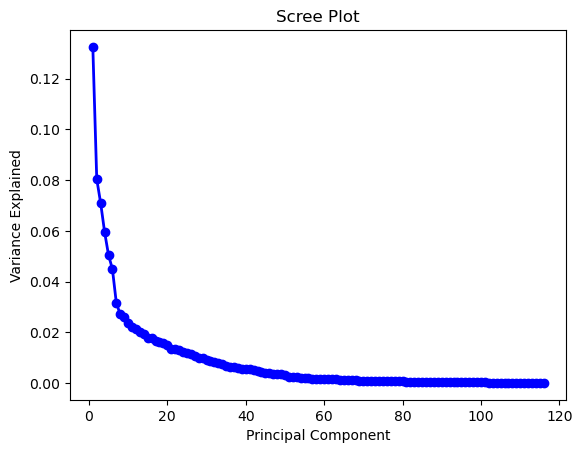

In [57]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [58]:
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance ratio
cumulative_explained_variance_ratio = explained_variance_ratio.cumsum()

print("Explained variance ratio for all component:", sum(explained_variance_ratio))

# Print the explained variance ratio for each component
print("Explained variance ratio for each component:", explained_variance_ratio)

# Print the cumulative explained variance ratio
print("Cumulative explained variance ratio:", cumulative_explained_variance_ratio)

Explained variance ratio for all component: 1.0
Explained variance ratio for each component: [1.32567945e-01 8.04266572e-02 7.09118291e-02 5.95683487e-02
 5.04949937e-02 4.48684633e-02 3.14822833e-02 2.70797524e-02
 2.58612304e-02 2.37266904e-02 2.20166038e-02 2.14638717e-02
 2.02358341e-02 1.92712268e-02 1.77969374e-02 1.76495225e-02
 1.65787059e-02 1.61544953e-02 1.55819850e-02 1.50309018e-02
 1.35214999e-02 1.33990324e-02 1.29194003e-02 1.23611886e-02
 1.18621019e-02 1.13184802e-02 1.06696761e-02 9.99504872e-03
 9.65919278e-03 9.14702013e-03 8.77009747e-03 8.31529305e-03
 7.80500741e-03 7.41208754e-03 6.65461468e-03 6.29293220e-03
 6.10790544e-03 5.70003091e-03 5.53618886e-03 5.44233839e-03
 5.32057462e-03 4.90637714e-03 4.75299327e-03 4.46496400e-03
 4.07187966e-03 3.89717835e-03 3.71721368e-03 3.40863287e-03
 3.34388597e-03 3.12734654e-03 2.53253514e-03 2.42952885e-03
 2.34485795e-03 2.10073677e-03 1.98889028e-03 1.89456200e-03
 1.67739014e-03 1.66350047e-03 1.62960906e-03 1.56903

In [59]:
# Get the names of the original variables
original_variable_names = dummy_df.columns.tolist()

# Now, let's print for pca_fit12 (with 6 components)
print("\nPrinting top variables for pca_fit12 (with 6 components):")
for i in range(len(pca_fit12.components_)):
    # Loadings of the i-th principal component
    component_loadings = pca_fit12.components_[i] 
    # Get the indices of top 6 variables
    top_variable_indices = component_loadings.argsort()[::-1][:6]  
    # Get variable names
    top_variables = [original_variable_names[idx] for idx in top_variable_indices]  
print(f"Principal Component {i+1} Top Variables:", top_variables)



Printing top variables for pca_fit12 (with 6 components):
Principal Component 6 Top Variables: ['Carbon monoxide detector', 'Fire extinguisher', 'First aid kit', 'Smoke detector', 'Safety card', 'Lock on bedroom door']


In [60]:
df_cleaned = data_cleaned.copy() 

# Reset the index to start from 1 to 32,349
df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned.index += 0
df_cleaned.index.name = 'id'

# Create a new DataFrame to append the modified data
new_df = pd.DataFrame()

# Append the modified DataFrame to the new DataFrame
new_df = pd.concat([new_df, df_cleaned])

# Now new_df contains the modified data with IDs starting from 1 to 32,349
data_cleaned=new_df.copy()

In [61]:
# Load PCA results
pca_results = pd.DataFrame(pca_fit12.components_)

# Merge PCA results with original data
result = pd.concat([new_df, pca_df], axis=1)

In [69]:
# Mapping of old column names to new column names
new_names = {0: 'pca1', 1: 'pca2', 2: 'pca3',3: 'pca4', 4: 'pca5', 5: 'pca6'}
 
# Rename columns
result.rename(columns=new_names, inplace=True)#

In [70]:
data_cleaned1=pd.read_csv("C:/Users/navab/Downloads/data_cleaned.csv")

In [71]:
draft_result = pd.concat([data_cleaned1, pca_df], axis=1)

In [72]:
#change pca values when rerunnning the code

In [73]:
np.random.seed(42)

In [74]:
X = result[['pca1','pca2','pca3','pca4','pca5','pca6', 'room_type','bathrooms','bedrooms','accommodates','cleaning_fee','Borough']] # Dropping irrelevant columns
y = result['log_price']

In [75]:
# Load the new Excel file
new_data = pd.read_excel('C:/Users/navab/OneDrive/Documents/masterclass/append.xlsx')
#C:/Users/navab/OneDrive/Documents/masterclass/append


# Assuming the new columns you want to append are named 'column1' and 'column2'
new_columns = new_data[['avg_lead_time','min_lead_time','min_airport_time', 'avg_airport_time','man_time',
                        'bro_time','que_time','bnx_time','sta_time','nj_time']]

# Concatenate the new columns with the existing features matrix X
X = pd.concat([X, new_columns], axis=1)

# Now X contains the additional columns from the new dataset
eda = pd.concat([X, y], axis=1)

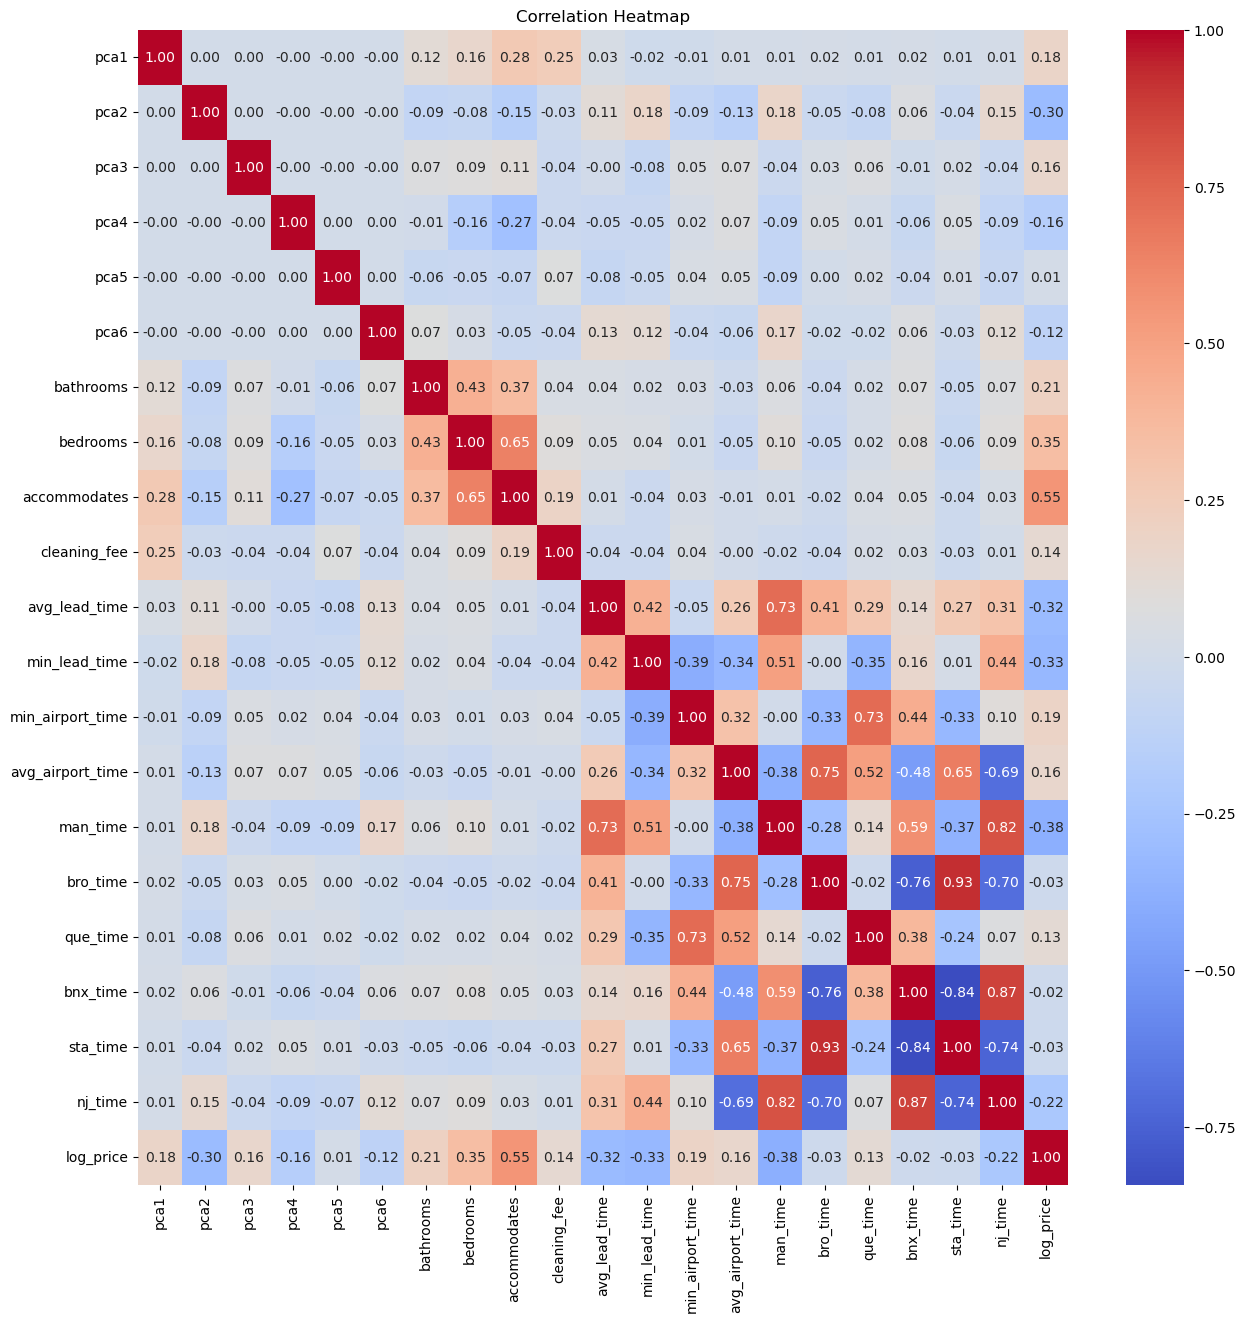

In [77]:
numerical_columns = ['pca1','pca2','pca3','pca4','pca5','pca6','bathrooms', 'bedrooms', 'accommodates', 'cleaning_fee',
                  'avg_lead_time', 'min_lead_time', 'min_airport_time',
                  'avg_airport_time', 'man_time', 'bro_time', 'que_time',
                  'bnx_time', 'sta_time', 'nj_time','log_price']
X = pd.concat([X, y], axis=1)
data_numeric1 = X[numerical_columns].apply(pd.to_numeric, errors='coerce')
 
# Drop rows containing NaN values
data_numeric1 = data_numeric1.dropna()
 
# Calculate the correlation matrix
correlation_matrix = data_numeric1.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(data_numeric1.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [78]:
X=X.drop("log_price",axis='columns')

In [79]:
X.dtypes

pca1                float64
pca2                float64
pca3                float64
pca4                float64
pca5                float64
pca6                float64
room_type            object
bathrooms           float64
bedrooms            float64
accommodates          int64
cleaning_fee           bool
Borough              object
avg_lead_time       float64
min_lead_time       float64
min_airport_time    float64
avg_airport_time    float64
man_time            float64
bro_time            float64
que_time            float64
bnx_time            float64
sta_time            float64
nj_time             float64
dtype: object

# Test Train Split

In [80]:
# Split the data into train and test sets (60/20/20)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [81]:
X_train.dtypes

pca1                float64
pca2                float64
pca3                float64
pca4                float64
pca5                float64
pca6                float64
room_type            object
bathrooms           float64
bedrooms            float64
accommodates          int64
cleaning_fee           bool
Borough              object
avg_lead_time       float64
min_lead_time       float64
min_airport_time    float64
avg_airport_time    float64
man_time            float64
bro_time            float64
que_time            float64
bnx_time            float64
sta_time            float64
nj_time             float64
dtype: object

# One Hot Encoding

In [82]:
#identifying numerical and categorial columns for one-hot encoding
numerical_columns = ['pca1','pca2','pca3','pca4','pca5','pca6','bathrooms', 'bedrooms', 'accommodates', 'cleaning_fee',
                  'avg_lead_time', 'min_lead_time', 'min_airport_time',
                  'avg_airport_time', 'man_time', 'bro_time', 'que_time',
                  'bnx_time', 'sta_time', 'nj_time']
categorical_columns = ['room_type','Borough']

# Defining Model Evaluation Parameters

In [83]:
# Calculate RMSE and R2 for each model
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

# Preprocessing Pipeline 

In [84]:
# Define preprocessing steps for numerical and categorical columns
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [85]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [86]:
# Combine preprocessing pipelines using ColumnTransformer
preprocessor = ColumnTransformer([
    ('cat', categorical_pipeline, categorical_columns),
    ('num', numerical_pipeline, numerical_columns)
])

# 1. Linear Regression

In [87]:
# Define the Linear model
linear_model = LinearRegression()

In [88]:
X_train.columns = X_train.columns.astype(str)

In [89]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['room_type', 'Borough']),
                                ('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['pca1', 'pca2', 'pca3', 'pca4', 'pca5',
                                  'pca6', 'bathrooms', 'bedrooms',
                                  'accommodates', 'cleaning_fee',
                                  'avg_lead_time', 'min_lead_time',
                                  'min_airport_time', 'avg_airport_time',
                                  'man_time', 'bro_time', 'que_time',
                                  'bnx_time', 'sta_time', 'nj_time'])])

In [90]:
# Transform the training data using the fitted preprocessor
X_train_transformed = preprocessor.transform(X_train)

In [91]:
# Fit the models
linear_model.fit(X_train_transformed, y_train) 

LinearRegression()

# Predictions - Train

In [92]:
# 1. Training dataset -
linear_pred_train = linear_model.predict(X_train_transformed)

In [93]:
linear_train_rmse, linear_train_r2 = evaluate_model(y_train, linear_pred_train)

In [94]:
# Evaluating Performance
print("Linear Regression: \nRMSE =", linear_train_rmse, "\nR2 =", linear_train_r2)

Linear Regression: 
RMSE = 0.38648283927860133 
R2 = 0.6586252064977051


In [95]:
X_val.columns = X_val.columns.astype(str)

In [96]:
preprocessor.fit(X_val)

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['room_type', 'Borough']),
                                ('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['pca1', 'pca2', 'pca3', 'pca4', 'pca5',
                                  'pca6', 'bathrooms', 'bedrooms',
                                  'accommodates', 'cleaning_fee',
                                  'avg_lead_time', 'min_lead_time',
                                  'min_airport_time', 'avg_airport_time',
                                  'man_time', 'bro_time', 'que_time',
                                  'bnx_time', 'sta_time', 'nj_time'])])

In [97]:
# Transform the training data using the fitted preprocessor
X_val_transformed = preprocessor.transform(X_val)

In [98]:
# Fit the models
linear_model.fit(X_val_transformed, y_val) 

LinearRegression()

In [99]:
# 2. Validation dataset - 
linear_pred_val = linear_model.predict(X_val_transformed)

In [100]:
linear_val_rmse, linear_val_r2 = evaluate_model(y_val, linear_pred_val)

In [101]:
# Evaluating Performance
print("Linear Regression: \nRMSE =", linear_val_rmse, "\nR2 =", linear_val_r2)

Linear Regression: 
RMSE = 0.389301317527569 
R2 = 0.6548519211135746


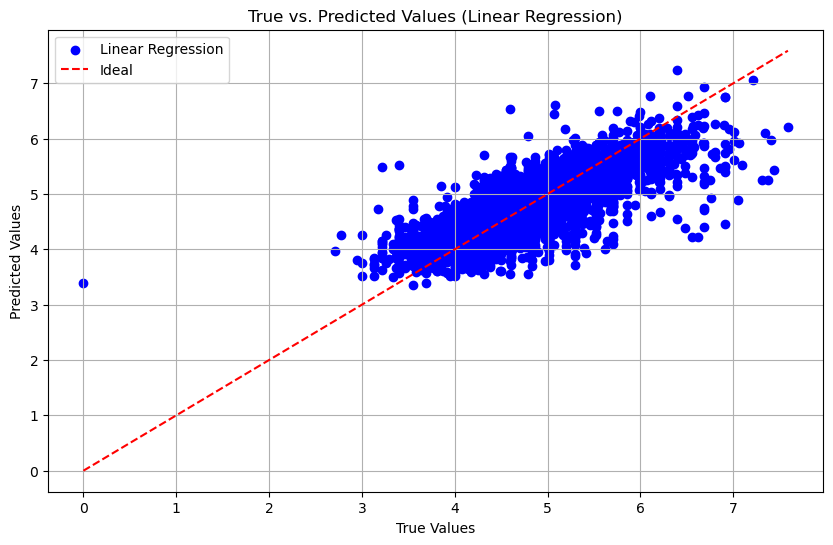

In [109]:
# Plot true vs. predicted values for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, linear_pred_test, color='blue', label='Linear Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Ideal')
plt.title('True vs. Predicted Values (Linear Regression)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# 2. Ridge Regression

In [110]:
param_grid_ridge = {'ridge__alpha': [0.1, 1.0, 10.0]}

In [111]:
pipeline_ridge = Pipeline([
    ('preprocessor', preprocessor),
    ('ridge', Ridge())
])

In [112]:
# Define grid search for each model
grid_search_ridge = GridSearchCV(pipeline_ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')

# Predictions : Train

In [113]:
# Convert column names to strings
X_train.columns = X_train.columns.astype(str)

In [114]:
grid_search_ridge.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['pca1',
                                                                          'pca2',
                                                                          'pca3',
                                                                          'pca4',
                                                                          'pca5',
                                                                          'pca6',
                                                                          'bathrooms',
                                                                          'bedrooms',
                                                                          'accommodates',
                                                                          'cleaning_fee',
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [115]:
#get the best estimators
best_ridge = grid_search_ridge.best_estimator_

In [116]:
# Predictions for Ridge and Lasso
ridge_pred = best_ridge.predict(X_train)

In [117]:
# Calculate RMSE and R2 for Ridge and Lasso
ridge_train_rmse, ridge_train_r2 = evaluate_model(y_train, ridge_pred)

In [118]:
print("Ridge: \nRMSE =", ridge_train_rmse, "R2 =", ridge_train_r2)

Ridge: 
RMSE = 0.3864746561476146 R2 = 0.658639662431024


# Prediction Val

In [119]:
# Convert column names to strings
X_val.columns = X_val.columns.astype(str)

In [120]:
grid_search_ridge.fit(X_val, y_val)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['pca1',
                                                                          'pca2',
                                                                          'pca3',
                                                                          'pca4',
                                                                          'pca5',
                                                                          'pca6',
                                                                          'bathrooms',
                                                                          'bedrooms',
                                                                          'accommodates',
                                                                          'cleaning_fee',
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [121]:
#get the best estimators
best_ridge = grid_search_ridge.best_estimator_

In [122]:
# Predictions for Ridge and Lasso
ridge_pred = best_ridge.predict(X_val)

In [123]:
# Calculate RMSE and R2 for Ridge and Lasso
ridge_val_rmse, ridge_val_r2 = evaluate_model(y_val, ridge_pred)

In [124]:
print("Ridge: \nRMSE =", ridge_val_rmse, "R2 =", ridge_val_r2)

Ridge: 
RMSE = 0.38930462697649687 R2 = 0.6548460528837828


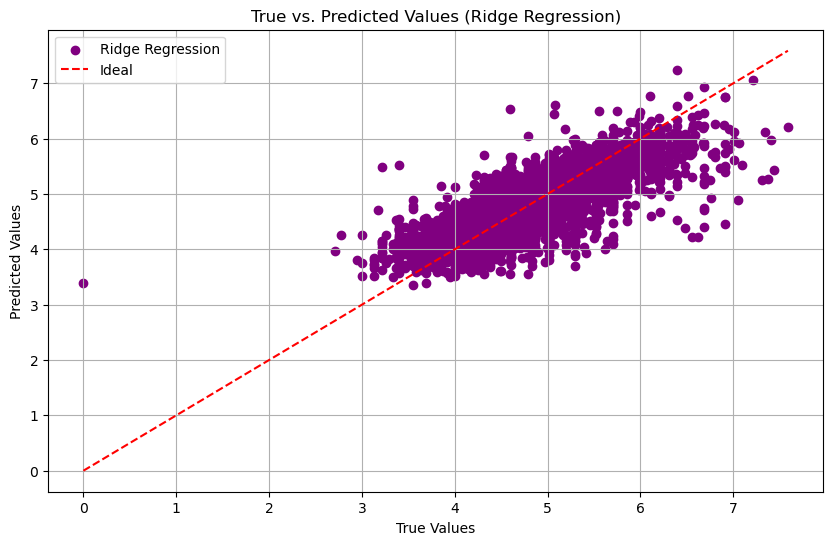

In [131]:
# Plot true vs. predicted values for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, ridge_pred, color='purple', label='Ridge Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Ideal')
plt.title('True vs. Predicted Values (Ridge Regression)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# 3. Lasso

In [132]:
param_grid_lasso = {'lasso__alpha': [0.1, 1.0, 10.0]}

In [133]:
pipeline_lasso = Pipeline([
    ('preprocessor', preprocessor),
    ('lasso', Lasso())
])

In [134]:
grid_search_lasso = GridSearchCV(pipeline_lasso, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')

# Prediction Train

In [135]:
# Convert column names to strings
X_train.columns = X_train.columns.astype(str)

In [136]:
grid_search_lasso.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['pca1',
                                                                          'pca2',
                                                                          'pca3',
                                                                          'pca4',
                                                                          'pca5',
                                                                          'pca6',
                                                                          'bathrooms',
                                                                          'bedrooms',
                                                                          'accommodates',
                                                                          'cleaning_fee',
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': [0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [137]:
best_lasso = grid_search_lasso.best_estimator_

In [138]:
lasso_pred = best_lasso.predict(X_train)

In [139]:
lasso_train_rmse, lasso_train_r2 = evaluate_model(y_train, lasso_pred)

In [140]:
print("Lasso: \nRMSE =", lasso_train_rmse, "R2 =", lasso_train_r2)

Lasso: 
RMSE = 0.4703885768706175 R2 = 0.4943097810512993


# Prediction val

In [141]:
# Convert column names to strings
X_train.columns = X_train.columns.astype(str)

In [142]:
grid_search_lasso.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['pca1',
                                                                          'pca2',
                                                                          'pca3',
                                                                          'pca4',
                                                                          'pca5',
                                                                          'pca6',
                                                                          'bathrooms',
                                                                          'bedrooms',
                                                                          'accommodates',
                                                                          'cleaning_fee',
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': [0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [143]:
best_lasso = grid_search_lasso.best_estimator_

In [144]:
lasso_pred = best_lasso.predict(X_train)

In [145]:
lasso_train_rmse, lasso_train_r2 = evaluate_model(y_train, lasso_pred)

In [146]:
print("Ridge: \nRMSE =", ridge_train_rmse, "R2 =", ridge_train_r2)

Ridge: 
RMSE = 0.3864746561476146 R2 = 0.658639662431024


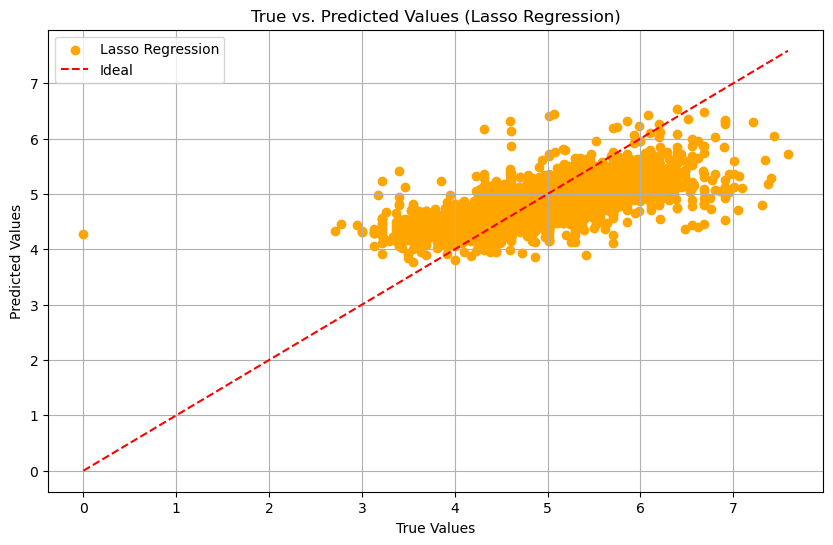

In [153]:
# Plot true vs. predicted values for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lasso_pred, color='orange', label='Lasso Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Ideal')
plt.title('True vs. Predicted Values (Lasso Regression)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# 4.Random Forest

In [154]:
param_grid_random_forest = {'random_forest__n_estimators': [50, 100, 150],
                           'random_forest__max_depth': [1,2,3,4]}

In [155]:
pipeline_random_forest = Pipeline([
    ('preprocessor', preprocessor),
    ('random_forest', RandomForestRegressor())
])

In [156]:
grid_search_random_forest = GridSearchCV(pipeline_random_forest, param_grid_random_forest, cv=5, scoring='neg_mean_squared_error')

# Prediction Train

In [157]:
X_train.columns = X_train.columns.astype(str)

In [158]:
grid_search_random_forest.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['pca1',...
                                                                          'bedrooms',
                                                                          'accommodates',
                                                                          'cleaning_fee',
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('random_forest',
                                        RandomForestRegressor())]),
             param_grid={'random_forest__max_depth': [1, 2, 3, 4],
                         'random_forest__n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [159]:
best_random_forest = grid_search_random_forest.best_estimator_

In [160]:
rf_pred = best_random_forest.predict(X_train)

In [161]:
rf_train_rmse, rf_train_r2 = evaluate_model(y_train, rf_pred)

In [162]:
print("Random Forest: \nRMSE =", rf_train_rmse, "R2 =", rf_train_r2)

Random Forest: 
RMSE = 0.4065722567614496 R2 = 0.6222134420451775


# Prediction val

In [163]:
X_val.columns = X_val.columns.astype(str)

In [164]:
grid_search_random_forest.fit(X_val, y_val)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['pca1',...
                                                                          'bedrooms',
                                                                          'accommodates',
                                                                          'cleaning_fee',
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('random_forest',
                                        RandomForestRegressor())]),
             param_grid={'random_forest__max_depth': [1, 2, 3, 4],
                         'random_forest__n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [165]:
best_random_forest = grid_search_random_forest.best_estimator_

In [166]:
rf_pred = best_random_forest.predict(X_val)

In [167]:
rf_val_rmse, rf_val_r2 = evaluate_model(y_val, rf_pred)

In [168]:
print("Random Forest: \nRMSE =", rf_val_rmse, "R2 =", rf_val_r2)

Random Forest: 
RMSE = 0.403494942162454 R2 = 0.6292254608748855


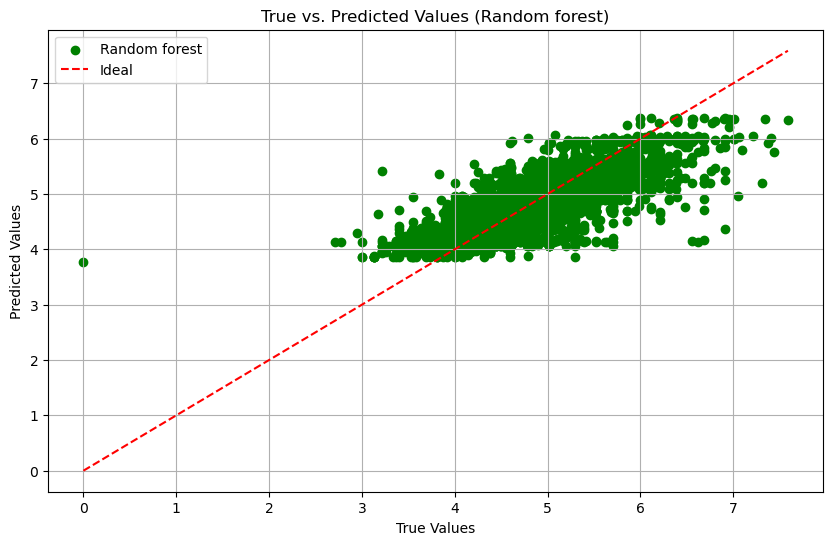

In [175]:
# Plot true vs. predicted values for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred, color='green', label='Random forest')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Ideal')
plt.title('True vs. Predicted Values (Random forest)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# 5. XGradient Boosting

In [176]:
param_grid_xgb = {'xgb__n_estimators': [50, 100, 150],
                  'xgb__learning_rate': [0.05, 0.1, 0.2],
                 'xgb__max_depth': [3, 5, 7]}

In [177]:
pipeline_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb', XGBRegressor())
])

In [178]:
grid_search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=5, scoring='neg_mean_squared_error')

# Prediction Train

In [179]:
# Convert column names to strings
X_train.columns = X_train.columns.astype(str)

In [180]:
grid_search_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['pca1',...
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...))]),
             param_grid={'xgb__learning_rate': [0.05, 0.1, 0.2],
                         'xgb__max_depth': [3, 5, 7],
                         'xgb__n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [181]:
best_xgb = grid_search_xgb.best_estimator_

In [182]:
xgb_pred = best_xgb.predict(X_train)

In [183]:
xgb_train_rmse, xgb_train_r2 = evaluate_model(y_train, xgb_pred)

In [184]:
print("XGBoost: \nRMSE =", xgb_train_rmse, "R2 =", xgb_train_r2)

XGBoost: 
RMSE = 0.3370507369611229 R2 = 0.7403659890792547


# Prediction val

In [185]:
# Convert column names to strings
X_val.columns = X_val.columns.astype(str)

In [186]:
grid_search_xgb.fit(X_val, y_val)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['pca1',...
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...))]),
             param_grid={'xgb__learning_rate': [0.05, 0.1, 0.2],
                         'xgb__max_depth': [3, 5, 7],
                         'xgb__n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [187]:
best_xgb = grid_search_xgb.best_estimator_

In [188]:
xgb_pred = best_xgb.predict(X_val)

In [189]:
xgb_val_rmse, xgb_val_r2 = evaluate_model(y_val, xgb_pred)

In [190]:
print("XGBoost: \nRMSE =", xgb_val_rmse, "R2 =", xgb_val_r2)

XGBoost: 
RMSE = 0.3098130054611431 R2 = 0.781408634525833


# Prediction Test

In [ ]:
# Convert column names to strings
X_test.columns = X_test.columns.astype(str)

In [192]:
grid_search_xgb.fit(X_test, y_test)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['pca1',...
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...))]),
             param_grid={'xgb__learning_rate': [0.05, 0.1, 0.2],
                         'xgb__max_depth': [3, 5, 7],
                         'xgb__n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [193]:
best_xgb = grid_search_xgb.best_estimator_

In [194]:
xgb_pred = best_xgb.predict(X_test)

In [195]:
xgb_test_rmse, xgb_test_r2 = evaluate_model(y_test, xgb_pred)

In [196]:
print("XGBoost: \nRMSE =", xgb_test_rmse, "R2 =", xgb_test_r2)

XGBoost: 
RMSE = 0.33069794148580695 R2 = 0.7494599755599853


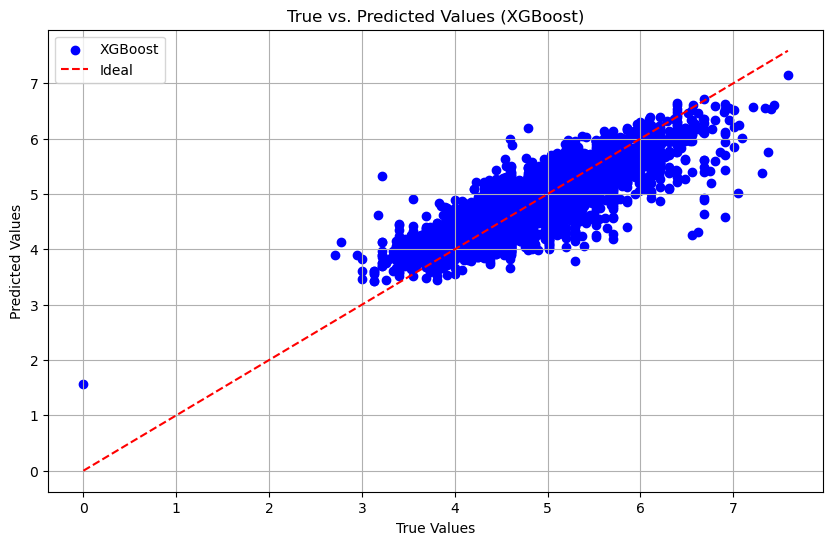

In [197]:
# Plot true vs. predicted values for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, xgb_pred, color='blue', label='XGBoost')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Ideal')
plt.title('True vs. Predicted Values (XGBoost)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# ANN

In [198]:
# Define hyperparameter grid for ANN
param_grid_ann = {
    'ann__hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'ann__activation': ['relu', 'tanh', 'logistic'],
    'ann__alpha': [0.0001, 0.001, 0.01],
}

In [199]:
# Define ANN pipeline
pipeline_ann = Pipeline([
    ('preprocessor', preprocessor),
    ('ann', MLPRegressor(max_iter=500))
])

In [200]:
# Grid search for ANN
grid_search_ann = GridSearchCV(pipeline_ann, param_grid_ann, cv=5, scoring='neg_mean_squared_error')


# Prediction Train

In [201]:
# Convert column names to strings
X_train.columns = X_train.columns.astype(str)

In [202]:
# Fit the grid search object
grid_search_ann.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['pca1',...
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('ann', MLPRegressor(max_iter=500))]),
             param_grid={'ann__activation': ['relu', 'tanh', 'logistic'],
                         'ann__alpha': [0.0001, 0.001, 0.01],
                         'ann__hidden_layer_sizes': [(50,), (100,), (50, 50)]},
             scoring='neg_mean_squared_error')

In [203]:
# Get the best estimator
best_ann = grid_search_ann.best_estimator_

In [204]:
# Evaluate the model
ann_train_rmse, ann_train_r2 = evaluate_model(best_ann.predict(X_train), y_train)

In [205]:
# Print RMSE and R2 score for ANN
print("ANN: \nRMSE =", ann_train_rmse, "R2 =", ann_train_r2)

ANN: 
RMSE = 0.36308319146898343 R2 = 0.5763824158084445


# Prediction val

In [206]:
# Convert column names to strings
X_val.columns = X_val.columns.astype(str)

In [207]:
# Fit the grid search object
grid_search_ann.fit(X_val, y_val)

C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['pca1',...
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('ann', MLPRegressor(max_iter=500))]),
             param_grid={'ann__activation': ['relu', 'tanh', 'logistic'],
                         'ann__alpha': [0.0001, 0.001, 0.01],
                         'ann__hidden_layer_sizes': [(50,), (100,), (50, 50)]},
             scoring='neg_mean_squared_error')

In [208]:
# Get the best estimator
best_ann = grid_search_ann.best_estimator_

In [209]:
# Evaluate the model
ann_val_rmse, ann_val_r2 = evaluate_model(best_ann.predict(X_val), y_val)

In [210]:
# Print RMSE and R2 score for ANN
print("ANN: \nRMSE =", ann_val_rmse, "R2 =", ann_val_r2)

ANN: 
RMSE = 0.372556361360435 R2 = 0.5256434892355275


# SVR

In [216]:
param_grid_svr = {'svr__C': [0.1, 1.0, 10.0],
                 'svr__kernel': ['linear', 'rbf']}

In [217]:
pipeline_svr = Pipeline([
    ('preprocessor', preprocessor),
    ('svr', SVR())
])

In [218]:
grid_search_svr = GridSearchCV(pipeline_svr, param_grid_svr, cv=5, scoring='neg_mean_squared_error')

# Prediction Train

In [219]:
# Convert column names to strings
X_train.columns = X_train.columns.astype(str)

In [220]:
grid_search_svr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['pca1',
                                                                          'pca2',
                                                                          'pca3',
                                                                          'pca4',
                                                                          'pca5',
                                                                          'pca6',
                                                                          'bathrooms',
                                                                          'bedrooms',
                                                                          'accommodates',
                                                                          'cleaning_fee',
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('svr', SVR())]),
             param_grid={'svr__C': [0.1, 1.0, 10.0],
                         'svr__kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error')

In [221]:
best_svr = grid_search_svr.best_estimator_

In [222]:
svr_pred = best_svr.predict(X_train)

In [223]:
svr_train_rmse, svr_train_r2 = evaluate_model(y_train, svr_pred)

In [224]:
print("SVR: \nRMSE =", svr_train_rmse, "R2 =", svr_train_r2)

SVR: 
RMSE = 0.34010688407720197 R2 = 0.7356362732596384


# Prediction val

In [225]:
# Convert column names to strings
X_val.columns = X_val.columns.astype(str)

In [226]:
grid_search_svr.fit(X_val, y_val)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['pca1',
                                                                          'pca2',
                                                                          'pca3',
                                                                          'pca4',
                                                                          'pca5',
                                                                          'pca6',
                                                                          'bathrooms',
                                                                          'bedrooms',
                                                                          'accommodates',
                                                                          'cleaning_fee',
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('svr', SVR())]),
             param_grid={'svr__C': [0.1, 1.0, 10.0],
                         'svr__kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error')

In [227]:
best_svr = grid_search_svr.best_estimator_

In [228]:
svr_pred = best_svr.predict(X_val)

In [229]:
svr_val_rmse, svr_val_r2 = evaluate_model(y_val, svr_pred)

In [230]:
print("SVR: \nRMSE =", svr_val_rmse, "R2 =", svr_val_r2)

SVR: 
RMSE = 0.3336412876976658 R2 = 0.7464910533272173


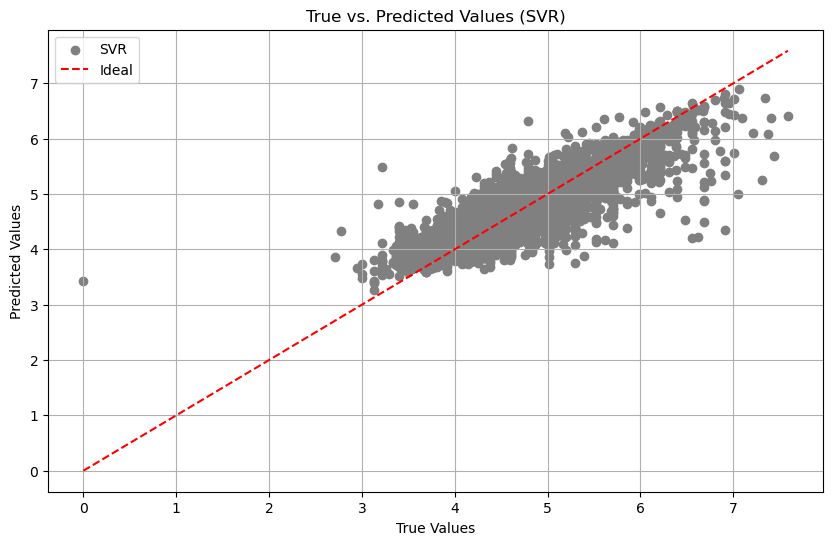

In [237]:
# Plot true vs. predicted values for SVR Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, svr_pred, color='grey', label='SVR')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Ideal')
plt.title('True vs. Predicted Values (SVR)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# For normal price

# 1. Linear regression

# Train

In [238]:
#data_cleaned['Price'] = np.exp(data_cleaned['log_price'])

In [361]:
data_cleaned.dtypes

id                                              int64
log_price                                     float64
property_type                                  object
room_type                                      object
amenities                                      object
                                               ...   
Wireless Internet                               int64
smooth pathway to front door                    int64
translation missing: en.hosting_amenity_49      int64
translation missing: en.hosting_amenity_50      int64
Price                                         float64
Length: 142, dtype: object

In [239]:
# Define the Linear model
linear_model1 = LinearRegression()

In [240]:
X_train.columns = X_train.columns.astype(str)

In [241]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['room_type', 'Borough']),
                                ('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['pca1', 'pca2', 'pca3', 'pca4', 'pca5',
                                  'pca6', 'bathrooms', 'bedrooms',
                                  'accommodates', 'cleaning_fee',
                                  'avg_lead_time', 'min_lead_time',
                                  'min_airport_time', 'avg_airport_time',
                                  'man_time', 'bro_time', 'que_time',
                                  'bnx_time', 'sta_time', 'nj_time'])])

In [242]:
# Transform the training data using the fitted preprocessor
X_train_transformed = preprocessor.transform(X_train)

In [243]:
linear_model1.fit(X_train_transformed, np.exp(y_train)) 

LinearRegression()

In [244]:
# 1. Training dataset -
linear_pred_train1 = linear_model1.predict(X_train_transformed)

In [245]:
linear_train_np_rmse, linear_train_np_r2 = evaluate_model(np.exp(y_train), linear_pred_train1)

In [246]:
# Evaluating Performance
print("Linear Regression: \nRMSE =", linear_train_np_rmse, "\nR2 =", linear_train_np_r2)

Linear Regression: 
RMSE = 95.89780068360699 
R2 = 0.4634163434485634


# val 

In [247]:
X_val.columns = X_val.columns.astype(str)

In [248]:
preprocessor.fit(X_val)

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['room_type', 'Borough']),
                                ('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['pca1', 'pca2', 'pca3', 'pca4', 'pca5',
                                  'pca6', 'bathrooms', 'bedrooms',
                                  'accommodates', 'cleaning_fee',
                                  'avg_lead_time', 'min_lead_time',
                                  'min_airport_time', 'avg_airport_time',
                                  'man_time', 'bro_time', 'que_time',
                                  'bnx_time', 'sta_time', 'nj_time'])])

In [249]:
# Transform the training data using the fitted preprocessor
X_val_transformed = preprocessor.transform(X_val)

In [250]:
linear_model1.fit(X_val_transformed, np.exp(y_val)) 

LinearRegression()

In [251]:
linear_pred_val1 = linear_model1.predict(X_val_transformed)

In [252]:
linear_val_np_rmse, linear_val_np_r2 = evaluate_model(np.exp(y_val), linear_pred_val1)

In [253]:
# Evaluating Performance
print("Linear Regression: \nRMSE =", linear_val_np_rmse, "\nR2 =", linear_val_np_r2)

Linear Regression: 
RMSE = 92.9365929858389 
R2 = 0.5108806517188851


# 2. Ridge

# Prediction Train

In [261]:
grid_search_ridge.fit(X_train, np.exp(y_train))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['pca1',
                                                                          'pca2',
                                                                          'pca3',
                                                                          'pca4',
                                                                          'pca5',
                                                                          'pca6',
                                                                          'bathrooms',
                                                                          'bedrooms',
                                                                          'accommodates',
                                                                          'cleaning_fee',
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [262]:
#get the best estimators
best_ridge = grid_search_ridge.best_estimator_

In [263]:
# Predictions for Ridge and Lasso
ridge_pred = best_ridge.predict(X_train)

In [264]:
# Calculate RMSE and R2 for Ridge and Lasso
ridge_train_np_rmse, ridge_train_np_r2 = evaluate_model(np.exp(y_train), ridge_pred)

In [265]:
print("Ridge: \nRMSE =", ridge_train_np_rmse, "R2 =", ridge_train_np_r2)

Ridge: 
RMSE = 95.89671270253893 R2 = 0.46342851869229107


# Prediction val

In [266]:
grid_search_ridge.fit(X_val, np.exp(y_val))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['pca1',
                                                                          'pca2',
                                                                          'pca3',
                                                                          'pca4',
                                                                          'pca5',
                                                                          'pca6',
                                                                          'bathrooms',
                                                                          'bedrooms',
                                                                          'accommodates',
                                                                          'cleaning_fee',
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [267]:
#get the best estimators
best_ridge = grid_search_ridge.best_estimator_

In [268]:
# Predictions for Ridge and Lasso
ridge_pred = best_ridge.predict(X_val)

In [269]:
# Calculate RMSE and R2 for Ridge and Lasso
ridge_val_np_rmse, ridge_val_np_r2 = evaluate_model(np.exp(y_val), ridge_pred)

In [270]:
print("Ridge: \nRMSE =", ridge_val_np_rmse, "R2 =", ridge_val_np_r2)

Ridge: 
RMSE = 92.93777093405649 R2 = 0.5108682527079614


# 3. Lasso

# Prediction Train

In [276]:
grid_search_lasso.fit(X_train, np.exp(y_train))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['pca1',
                                                                          'pca2',
                                                                          'pca3',
                                                                          'pca4',
                                                                          'pca5',
                                                                          'pca6',
                                                                          'bathrooms',
                                                                          'bedrooms',
                                                                          'accommodates',
                                                                          'cleaning_fee',
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': [0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [277]:
best_lasso = grid_search_lasso.best_estimator_

In [278]:
lasso_pred = best_lasso.predict(X_train)

In [279]:
lasso_train_np_rmse, lasso_train_np_r2 = evaluate_model(np.exp(y_train), lasso_pred)

In [280]:
print("Lasso: \nRMSE =", lasso_train_np_rmse, "R2 =", lasso_train_np_r2)

Lasso: 
RMSE = 95.99525315146539 R2 = 0.4623252241374277


# Prediction val

In [281]:
grid_search_lasso.fit(X_val, np.exp(y_val))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['pca1',
                                                                          'pca2',
                                                                          'pca3',
                                                                          'pca4',
                                                                          'pca5',
                                                                          'pca6',
                                                                          'bathrooms',
                                                                          'bedrooms',
                                                                          'accommodates',
                                                                          'cleaning_fee',
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': [0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [282]:
best_lasso = grid_search_lasso.best_estimator_

In [283]:
lasso_pred = best_lasso.predict(X_val)

In [284]:
lasso_val_np_rmse, lasso_val_np_r2 = evaluate_model(np.exp(y_val), lasso_pred)

In [285]:
print("Lasso: \nRMSE =", lasso_val_np_rmse, "R2 =", lasso_val_np_r2)

Lasso: 
RMSE = 93.05155314657054 R2 = 0.5096698473598162


# 4. Random Forest

# Prediction Train

In [291]:
grid_search_random_forest.fit(X_train, np.exp(y_train))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['pca1',...
                                                                          'bedrooms',
                                                                          'accommodates',
                                                                          'cleaning_fee',
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('random_forest',
                                        RandomForestRegressor())]),
             param_grid={'random_forest__max_depth': [1, 2, 3, 4],
                         'random_forest__n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [292]:
best_random_forest = grid_search_random_forest.best_estimator_

In [293]:
rf_pred = best_random_forest.predict(X_train)

In [294]:
rf_train_np_rmse, rf_train_np_r2 = evaluate_model(np.exp(y_train), rf_pred)

In [295]:
print("Random Forest: \nRMSE =", rf_train_np_rmse, "R2 =", rf_train_np_r2)

Random Forest: 
RMSE = 93.28043175258452 R2 = 0.4923069229040795


# Prediction val

In [296]:
grid_search_random_forest.fit(X_val, np.exp(y_val))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['pca1',...
                                                                          'bedrooms',
                                                                          'accommodates',
                                                                          'cleaning_fee',
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('random_forest',
                                        RandomForestRegressor())]),
             param_grid={'random_forest__max_depth': [1, 2, 3, 4],
                         'random_forest__n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [297]:
best_random_forest = grid_search_random_forest.best_estimator_

In [298]:
rf_pred = best_random_forest.predict(X_val)

In [299]:
rf_val_np_rmse, rf_val_np_r2 = evaluate_model(np.exp(y_val), rf_pred)

In [300]:
print("Random Forest: \nRMSE =", rf_val_np_rmse, "R2 =", rf_val_np_r2)

Random Forest: 
RMSE = 87.00207340361007 R2 = 0.5713522451641213


# 5. X Gradient Boosting

# Prediction Train

In [306]:
grid_search_xgb.fit(X_train, np.exp(y_train))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['pca1',...
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...))]),
             param_grid={'xgb__learning_rate': [0.05, 0.1, 0.2],
                         'xgb__max_depth': [3, 5, 7],
                         'xgb__n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [307]:
best_xgb = grid_search_xgb.best_estimator_

In [308]:
xgb_pred = best_xgb.predict(X_train)

In [309]:
xgb_train_np_rmse, xgb_train_np_r2 = evaluate_model(np.exp(y_train), xgb_pred)

In [310]:
print("XGBoost: \nRMSE =", xgb_train_np_rmse, "R2 =", xgb_train_np_r2)

XGBoost: 
RMSE = 80.68053619012734 R2 = 0.6201976060170604


# Prediction val

In [311]:
grid_search_xgb.fit(X_val, np.exp(y_val))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['pca1',...
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...))]),
             param_grid={'xgb__learning_rate': [0.05, 0.1, 0.2],
                         'xgb__max_depth': [3, 5, 7],
                         'xgb__n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [312]:
best_xgb = grid_search_xgb.best_estimator_

In [313]:
xgb_pred = best_xgb.predict(X_val)

In [314]:
xgb_val_np_rmse, xgb_val_np_r2 = evaluate_model(np.exp(y_val), xgb_pred)

In [315]:
print("XGBoost: \nRMSE =", xgb_val_np_rmse, "R2 =", xgb_val_np_r2)

XGBoost: 
RMSE = 74.31876773400721 R2 = 0.6872204517152377


# Prediction Test

In [316]:
grid_search_xgb.fit(X_test, np.exp(y_test))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['pca1',...
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...))]),
             param_grid={'xgb__learning_rate': [0.05, 0.1, 0.2],
                         'xgb__max_depth': [3, 5, 7],
                         'xgb__n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [317]:
best_xgb = grid_search_xgb.best_estimator_

In [318]:
xgb_pred = best_xgb.predict(X_test)

In [319]:
xgb_test_np_rmse, xgb_test_np_r2 = evaluate_model(np.exp(y_test), xgb_pred)

In [320]:
print("XGBoost: \nRMSE =", xgb_test_np_rmse, "R2 =", xgb_test_np_r2)

XGBoost: 
RMSE = 68.21107981843781 R2 = 0.7136564882271631


In [ ]:
# Plot true vs. predicted values for SVR Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, xgb_pred, color='grey', label='SVR')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Ideal')
plt.title('True vs. Predicted Values (SVR)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# 6. ANN

# Prediction train

In [321]:
# Fit the grid search object
grid_search_ann.fit(X_train, np.exp(y_train))

C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['pca1',...
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('ann', MLPRegressor(max_iter=500))]),
             param_grid={'ann__activation': ['relu', 'tanh', 'logistic'],
                         'ann__alpha': [0.0001, 0.001, 0.01],
                         'ann__hidden_layer_sizes': [(50,), (100,), (50, 50)]},
             scoring='neg_mean_squared_error')

In [322]:
# Get the best estimator
best_ann = grid_search_ann.best_estimator_

In [323]:
# Evaluate the model
ann_train_np_rmse, ann_train_np_r2 = evaluate_model(best_ann.predict(X_train), np.exp(y_train))

In [324]:
# Print RMSE and R2 score for ANN
print("ANN: \nRMSE =", ann_train_np_rmse, "R2 =", ann_train_np_r2)

ANN: 
RMSE = 85.30482005901924 R2 = 0.24494438281496256


# Prediction val

In [325]:
# Fit the grid search object
grid_search_ann.fit(X_val, np.exp(y_val))

C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['pca1',...
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('ann', MLPRegressor(max_iter=500))]),
             param_grid={'ann__activation': ['relu', 'tanh', 'logistic'],
                         'ann__alpha': [0.0001, 0.001, 0.01],
                         'ann__hidden_layer_sizes': [(50,), (100,), (50, 50)]},
             scoring='neg_mean_squared_error')

In [326]:
# Get the best estimator
best_ann = grid_search_ann.best_estimator_

In [327]:
# Evaluate the model
ann_val_np_rmse, ann_val_np_r2 = evaluate_model(best_ann.predict(X_val), np.exp(y_val))

In [328]:
# Print RMSE and R2 score for ANN
print("ANN: \nRMSE =", ann_val_np_rmse, "R2 =", ann_val_np_r2)

ANN: 
RMSE = 84.26998542125766 R2 = 0.3063942040127968


# SVR

# Prediction train

In [333]:
grid_search_svr.fit(X_train, np.exp(y_train))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['pca1',
                                                                          'pca2',
                                                                          'pca3',
                                                                          'pca4',
                                                                          'pca5',
                                                                          'pca6',
                                                                          'bathrooms',
                                                                          'bedrooms',
                                                                          'accommodates',
                                                                          'cleaning_fee',
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('svr', SVR())]),
             param_grid={'svr__C': [0.1, 1.0, 10.0],
                         'svr__kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error')

In [334]:
best_svr = grid_search_svr.best_estimator_

In [335]:
svr_pred = best_svr.predict(X_train)

In [336]:
svr_train_np_rmse, svr_train_np_r2 = evaluate_model(np.exp(y_train), svr_pred)

In [337]:
print("SVR: \nRMSE =", svr_train_np_rmse, "R2 =", svr_train_np_r2)

SVR: 
RMSE = 96.5328392957093 R2 = 0.4562862618036768


# Prediction val

In [338]:
grid_search_svr.fit(X_val, np.exp(y_val))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['pca1',
                                                                          'pca2',
                                                                          'pca3',
                                                                          'pca4',
                                                                          'pca5',
                                                                          'pca6',
                                                                          'bathrooms',
                                                                          'bedrooms',
                                                                          'accommodates',
                                                                          'cleaning_fee',
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('svr', SVR())]),
             param_grid={'svr__C': [0.1, 1.0, 10.0],
                         'svr__kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error')

In [339]:
best_svr = grid_search_svr.best_estimator_

In [340]:
svr_pred = best_svr.predict(X_val)

In [341]:
svr_val_np_rmse, svr_val_np_r2 = evaluate_model(np. exp(y_val), svr_pred)

In [342]:
print("SVR: \nRMSE =", svr_val_np_rmse, "R2 =", svr_val_np_r2)

SVR: 
RMSE = 99.10929852316623 R2 = 0.44374983537840507


In [348]:
data_cleaned['Price'] = np.exp(data_cleaned['log_price'])

C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

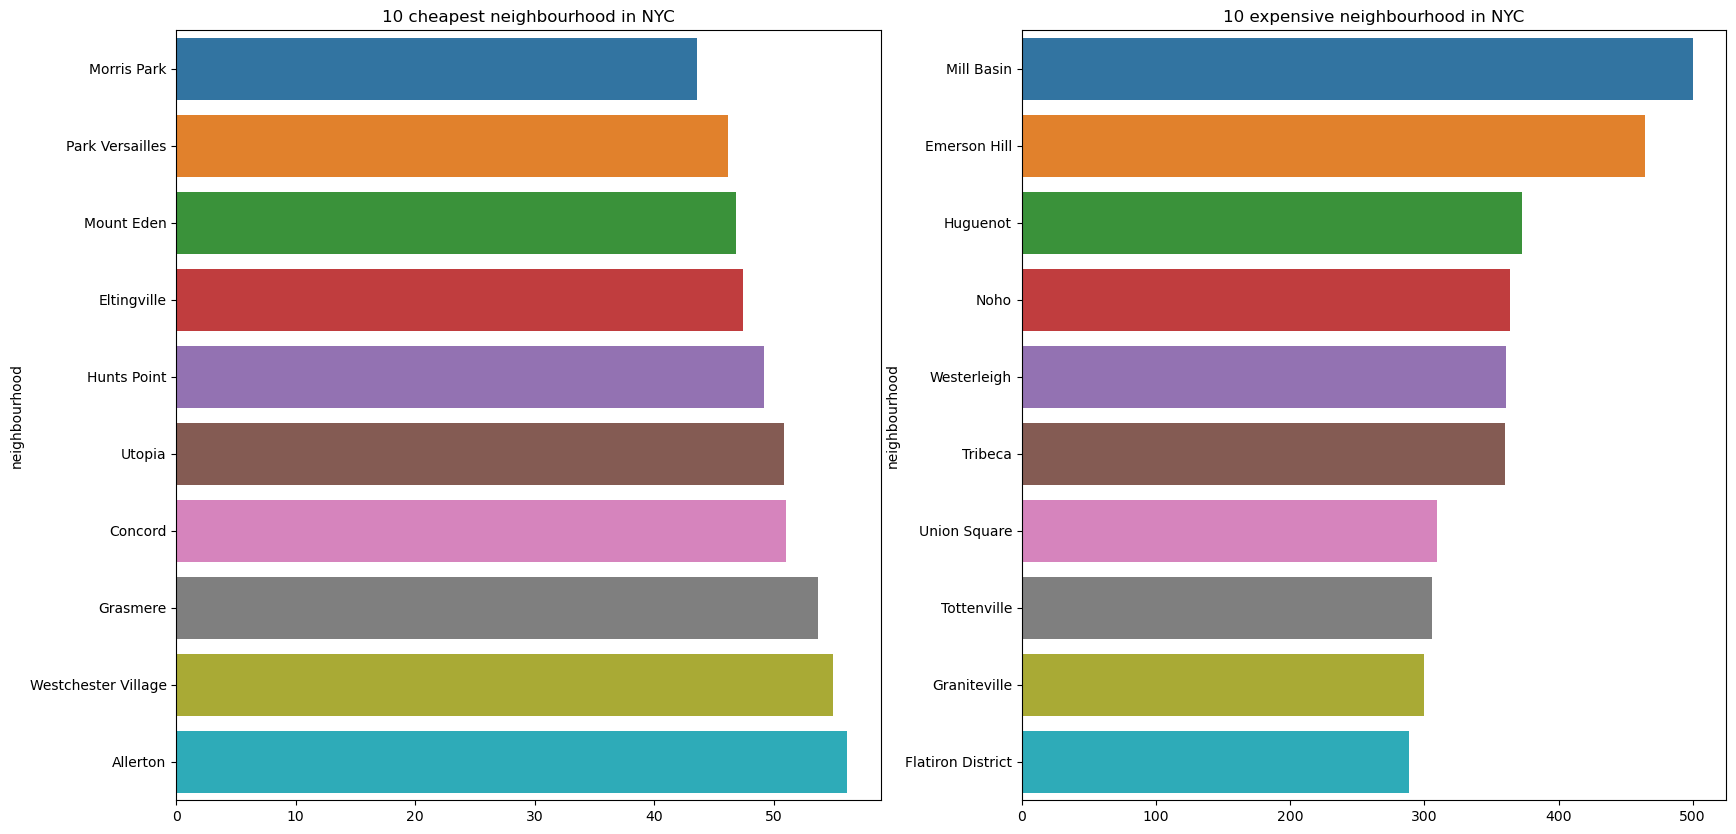

In [349]:
#Top 10 expensive & Cheapest neighbourhood in NYC
a = data_cleaned.groupby('neighbourhood')['Price'].mean().sort_values(ascending=True).head(10)
b = data_cleaned.groupby('neighbourhood')['Price'].mean().sort_values(ascending=False).head(10)
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
sns.barplot(y=a.index, x=a.values, ax=ax1)
ax1.set_title('10 cheapest neighbourhood in NYC')
ax2 = fig.add_subplot(122)
sns.barplot(y=b.index, x=b.values, ax=ax2)
ax2.set_title('10 expensive neighbourhood in NYC')
plt.show()

C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


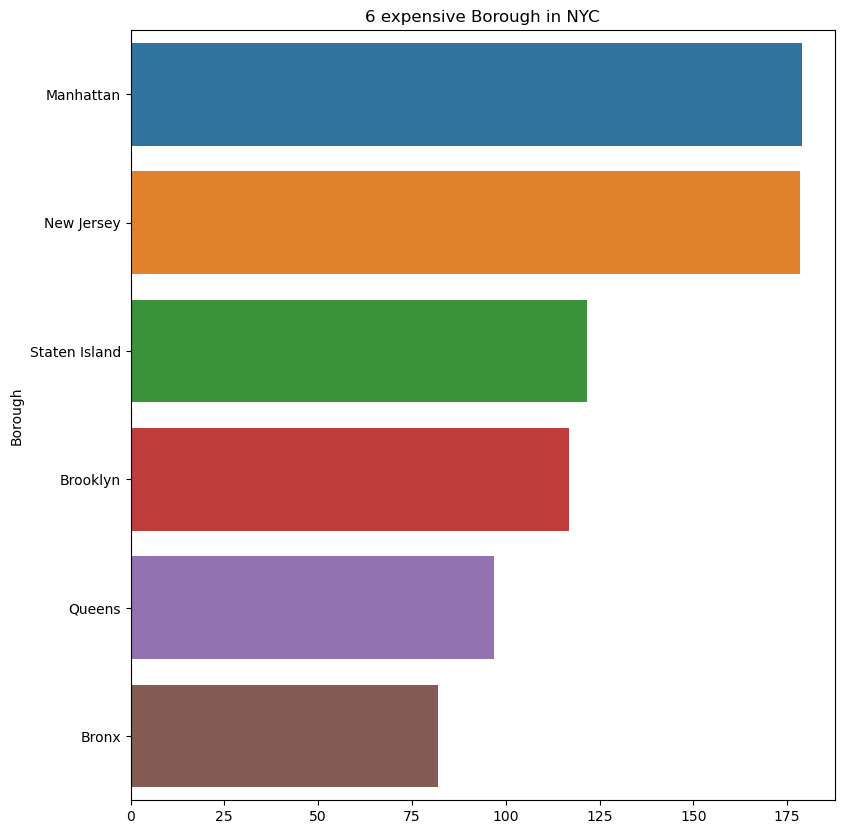

In [350]:
#Top 10 expensive & Cheapest Borough in NYC
a = data_cleaned.groupby('Borough')['Price'].mean().sort_values(ascending=True).head(10)
b = data_cleaned.groupby('Borough')['Price'].mean().sort_values(ascending=False).head(10)
fig = plt.figure(figsize=(20,10))
#ax1 = fig.add_subplot(121)
#sns.barplot(y=a.index, x=a.values, ax=ax1)
#ax1.set_title('6 cheapest Borough in NYC')
ax2 = fig.add_subplot(122)
sns.barplot(y=b.index, x=b.values, ax=ax2)
ax2.set_title('6 expensive Borough in NYC')
plt.show()

Text(0.5, 0, 'Type')

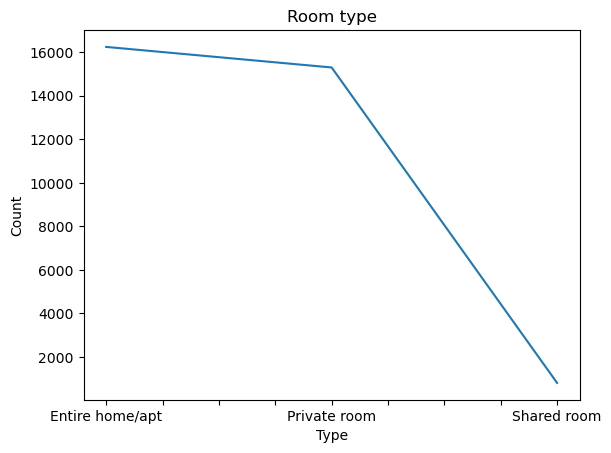

In [351]:
#Ploting room count
data_cleaned['room_type'].value_counts().plot(kind='line')
plt.title('Room type')
plt.ylabel('Count')
plt.xlabel('Type')

C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Price')

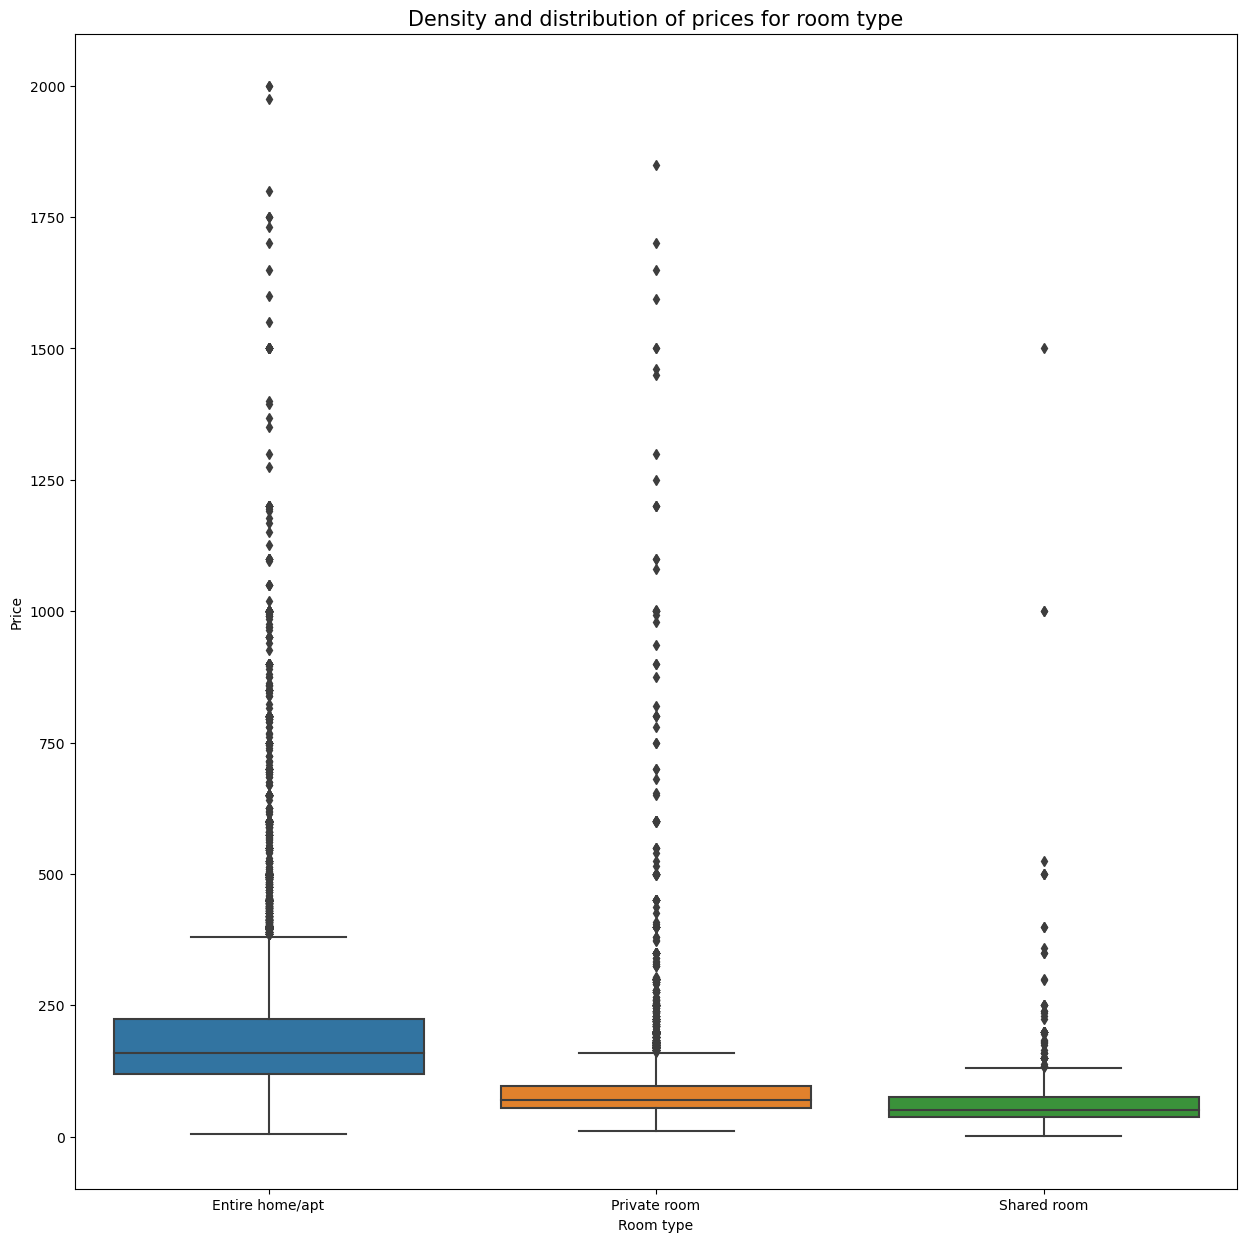

In [352]:
#Box Plot to view outliers
plt.figure(figsize=(15,15))
sns.boxplot(data=data_cleaned, x='room_type', y='Price')
plt.title('Density and distribution of prices for room type', fontsize=15)
plt.xlabel('Room type')
plt.ylabel("Price")

C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

Text(0.5, 1.0, 'Room type vs Price vs Instantly bookable')

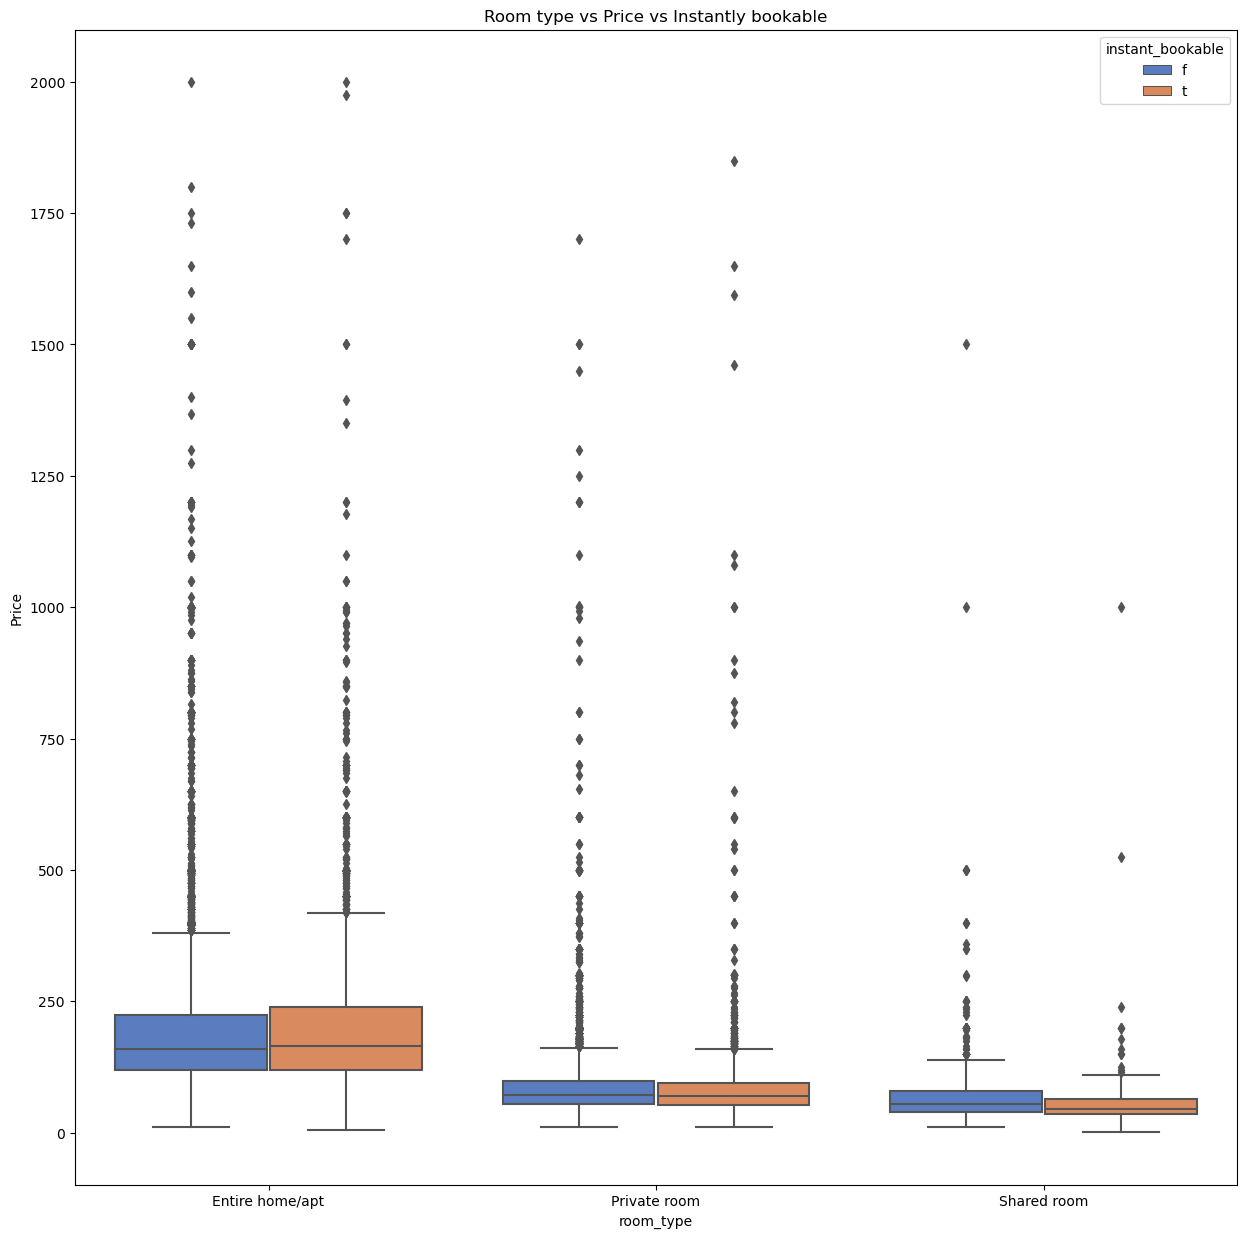

In [353]:
#correlating instant bookable rooms with price
plt.figure(figsize=(15,15))
sns.boxplot(x='room_type',y='Price', hue="instant_bookable", data=data_cleaned, palette='muted')
plt.title("Room type vs Price vs Instantly bookable")

C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

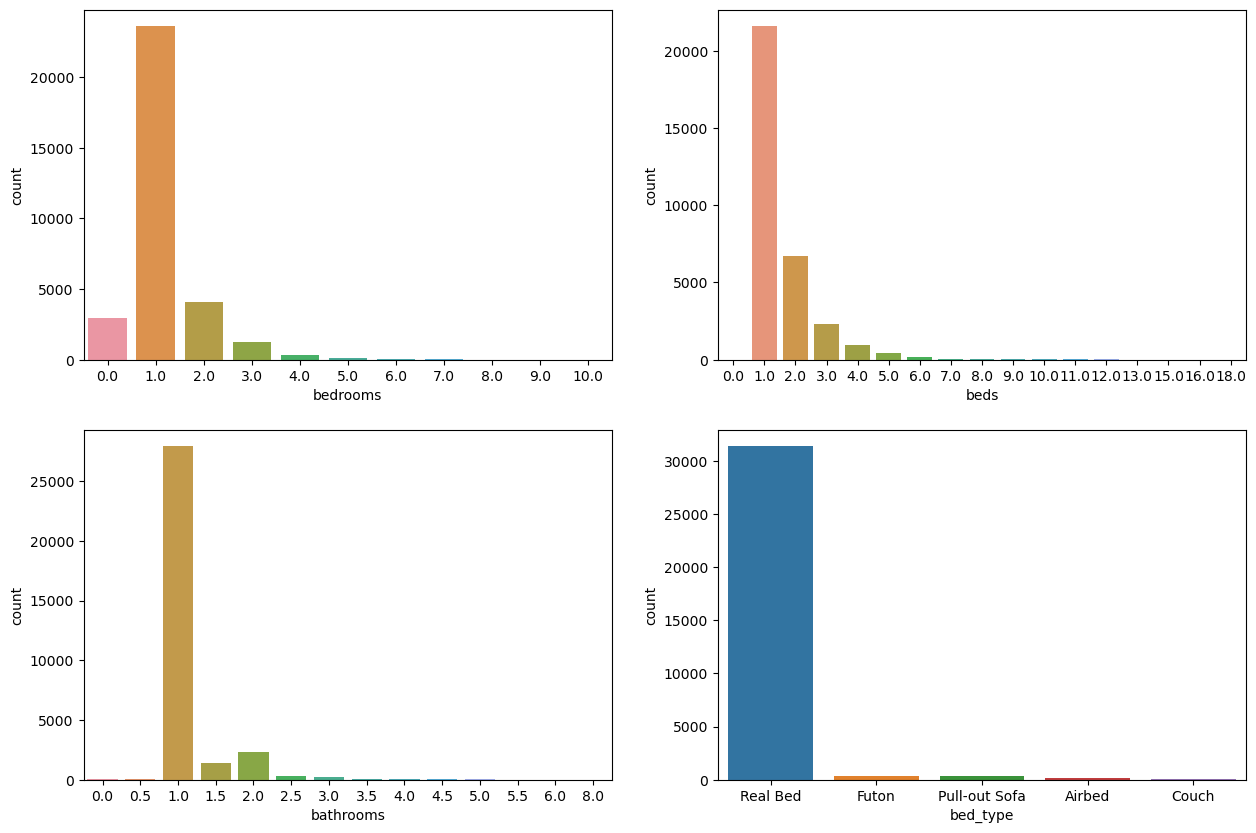

In [354]:
#plotting the count of bedrooms, beds and bathrooms.
a=['bedrooms','beds','bathrooms','bed_type']
fig, axes = plt.subplots(2,2, figsize=(15,10))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(a):
    f = sns.countplot(x=data_cleaned[c], data=data_cleaned, ax=axes[i])

C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Number of accomodates vs Average Price')

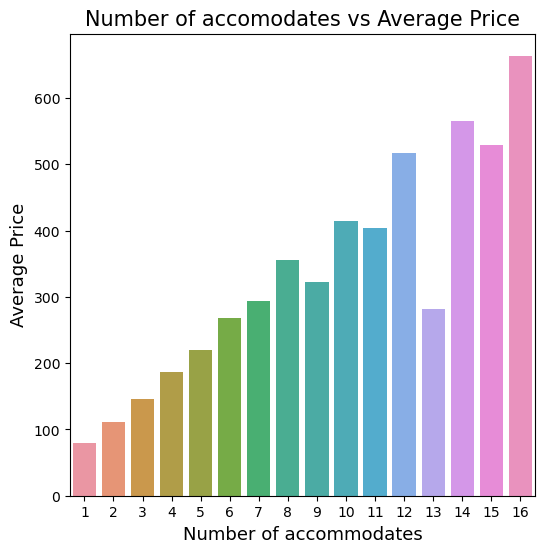

In [355]:
#plotting the number of accomodates vs mean price
a = data_cleaned.groupby('accommodates')['Price'].mean()
fig = plt.figure(figsize=(6,6))
sns.barplot(y=a.values, x=a.index)
plt.xlabel("Number of accommodates", size=13)
plt.ylabel("Average Price", size=13)
plt.title("Number of accomodates vs Average Price",size=15)

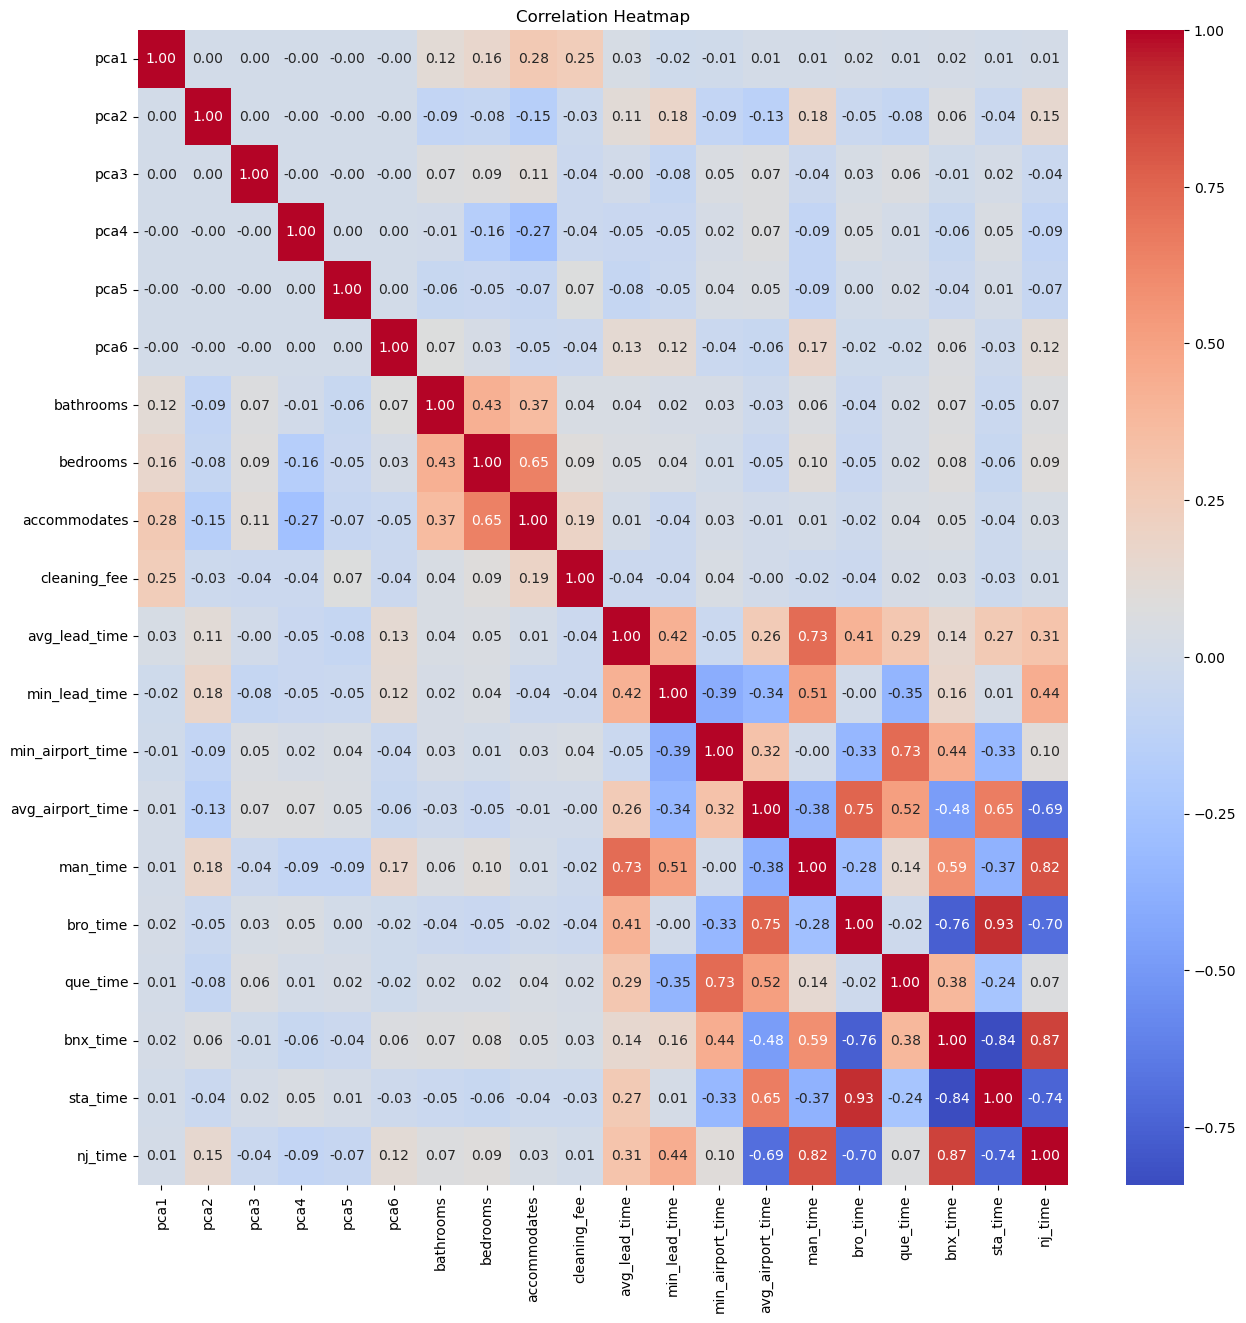

In [357]:
numerical_columns = ['pca1','pca2','pca3','pca4','pca5','pca6','bathrooms', 'bedrooms', 'accommodates', 'cleaning_fee',
                  'avg_lead_time', 'min_lead_time', 'min_airport_time',
                  'avg_airport_time', 'man_time', 'bro_time', 'que_time',
                  'bnx_time', 'sta_time', 'nj_time']
data_numeric1 = X[numerical_columns].apply(pd.to_numeric, errors='coerce')
 
# Drop rows containing NaN values
data_numeric1 = data_numeric1.dropna()
 
# Calculate the correlation matrix
correlation_matrix = data_numeric1.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(data_numeric1.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [362]:
from sklearn.metrics import mean_absolute_error

In [363]:
y_train

13370    4.369448
6932     4.174387
12579    4.060443
22041    4.174387
12838    4.127134
           ...   
29802    4.317488
5390     4.605170
860      4.787492
15795    4.317488
23654    4.828314
Name: log_price, Length: 19409, dtype: float64

In [367]:
from sklearn.metrics import mean_absolute_error

# Linear Regression
linear_model.fit(X_train_transformed, y_train)
linear_pred_train = linear_model.predict(X_train_transformed)
linear_mae_train = mean_absolute_error(y_train, linear_pred_train)

# Lasso
grid_search_lasso.fit(X_train, y_train)
lasso_pred_train = grid_search_lasso.predict(X_train)
lasso_mae_train = mean_absolute_error(y_train, lasso_pred_train)

# Ridge
grid_search_ridge.fit(X_train, y_train)
ridge_pred_train = grid_search_ridge.predict(X_train)
ridge_mae_train = mean_absolute_error(y_train, ridge_pred_train)

# Random Forest
grid_search_random_forest.fit(X_train, y_train)
random_forest_pred_train = grid_search_random_forest.predict(X_train)
random_forest_mae_train = mean_absolute_error(y_train, random_forest_pred_train)

# XGBoost
grid_search_xgb.fit(X_train, y_train)
xgb_pred_train = grid_search_xgb.predict(X_train)
xgb_mae_train = mean_absolute_error(y_train, xgb_pred_train)

# ANN
grid_search_ann.fit(X_train, y_train)
ann_pred_train = grid_search_ann.predict(X_train)
ann_mae_train = mean_absolute_error(y_train, ann_pred_train)

# SVR
grid_search_svr.fit(X_train, y_train)
svr_pred_train = grid_search_svr.predict(X_train)
svr_mae_train = mean_absolute_error(y_train, svr_pred_train)

# Print MAE values for each model
print("Mean Absolute Error (MAE) for each model on the training set:")
print("Linear Regression:", linear_mae_train)
print("Lasso:", lasso_mae_train)
print("Ridge:", ridge_mae_train)
print("Random Forest:", random_forest_mae_train)
print("XGBoost:", xgb_mae_train)
print("ANN:", ann_mae_train)
print("SVR:", svr_mae_train)


Mean Absolute Error (MAE) for each model on the training set:
Linear Regression: 0.2806548680400394
Lasso: 0.35823753208444026
Ridge: 0.2806258876676638
Random Forest: 0.2997718636984207
XGBoost: 0.24821799241681528
ANN: 0.2689655620232016
SVR: 0.23621669029912426


In [368]:
from sklearn.metrics import mean_absolute_error

# Linear Regression
linear_model.fit(X_val_transformed, y_val)
linear_pred_val = linear_model.predict(X_val_transformed)
linear_mae_val = mean_absolute_error(y_val, linear_pred_val)

# Lasso
grid_search_lasso.fit(X_val, y_val)
lasso_pred_val = grid_search_lasso.predict(X_val)
lasso_mae_val = mean_absolute_error(y_val, lasso_pred_val)

# Ridge
grid_search_ridge.fit(X_val, y_val)
ridge_pred_val = grid_search_ridge.predict(X_val)
ridge_mae_val = mean_absolute_error(y_val, ridge_pred_val)

# Random Forest
grid_search_random_forest.fit(X_val, y_val)
random_forest_pred_val = grid_search_random_forest.predict(X_val)
random_forest_mae_val = mean_absolute_error(y_val, random_forest_pred_val)

# XGBoost
grid_search_xgb.fit(X_val, y_val)
xgb_pred_val = grid_search_xgb.predict(X_val)
xgb_mae_val = mean_absolute_error(y_val, xgb_pred_val)

# ANN
grid_search_ann.fit(X_val, y_val)
ann_pred_val = grid_search_ann.predict(X_val)
ann_mae_val = mean_absolute_error(y_val, ann_pred_val)

# SVR
grid_search_svr.fit(X_val, y_val)
svr_pred_val = grid_search_svr.predict(X_val)
svr_mae_val = mean_absolute_error(y_val, svr_pred_val)

# Print MAE values for each model
print("Mean Absolute Error (MAE) for each model on the unseen data set:")
print("Linear Regression:", linear_mae_val)
print("Lasso:", lasso_mae_val)
print("Ridge:", ridge_mae_val)
print("Random Forest:", random_forest_mae_val)
print("XGBoost:", xgb_mae_val)
print("ANN:", ann_mae_val)
print("SVR:", svr_mae_val)


Mean Absolute Error (MAE) for each model on the unseen data set:
Linear Regression: 0.28247392454612946
Lasso: 0.36240000253171556
Ridge: 0.2824387859240963
Random Forest: 0.29975813060953566
XGBoost: 0.22980557378945782
ANN: 0.271663347504128
SVR: 0.2305638065213153
